<div style="text-align: center; margin: auto; background:#b4cc3d; padding:10px; color:white; font-family:Calibri ;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width:120px; padding-top: 20px;">
    <h1  style="font-size:2.8rem">Data Mining Project: ABCDEats Customer Data</h1>
    <p style='font-size:1.2rem;'>NOVA Information Management School </p>    
    <p style='font-size:1.2rem;'>Master in Data Science and Advanced Analytics</p>    
    <img src="https://cdni.iconscout.com/illustration/premium/thumb/food-delivery-service-by-scooter-illustration-download-in-svg-png-gif-file-formats--on-pack-e-commerce-shopping-illustrations-4403764.png" style="width:33rem;">
    <p style='font-size:1.3rem; padding:0; margin:0; font-weight:bold;'>Group 41 members:</p>
    <ul style='font-size:1.2rem; list-style-position: inside; padding-left:0; border:none;'>
        <li>Elcano Gaspar (20241021)</li>
        <li>Gasper Pereira (20230984)</li>
        <li>Pedro Costa (20222121)</li>
        <li>Rita Wang (20240551)</li>
    </ul> 
    <br>
    <p style='font-size:1.2rem; '>      Fall/Spring Semester 2024-2025</p>
</div>

<h1 style='margin-bottom: 3px' > Table of Contents </h1>

* [0. Imports and Dataset Loading](#imports)

* [1. Data Exploration](#dataexploration)
    * [1.1 Initial Analysis of the Dataset](#initial-analysis)
    * [1.2 Check for Missing Values](#missing-values)
    * [1.3 Duplicate Values](#duplicates)
    * [1.4 Data Types](#data-types)
    * [1.5 Variable Analysis](#variable-analysis)

* [2. Univariate Analysis](#univariate)
    * [2.1 Numerical Variables](#numerical)
    * [2.2 Categorical Variables](#categorical)

* [3. Data Preprocessing](#data-preprocessing)
    * [3.1 Feature Engineering](#feature-engineering)
        * [3.1.1 Numerical New Features](#numerical-new)
        * [3.1.2 Categorical New Features](#categorical-new)
    * [3.2 Imputation of Missing Values](#impute-missing)
    * [3.3 Outlier Removal](#outlier-removal)

* [4. Multivariate Analysis](#multivariate)
    * [4.1 Numericals vs. Numericals](#numerical-numerical)
    * [4.2 Categoricals vs. Categoricals](#categorical-categorical)
    * [4.3 Categoricals vs. Numericals](#categorical-numerical)
    * [4.4 Three Variables Associations](#3-variables)
    * [4.5 Co-occurrences](#co-occurences)


<h1 id='imports'>0. Imports and Dataset Loading</h1>

In [82]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings

from itertools import combinations
from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.preprocessing import RobustScaler

from functions import * 


from sklearn.cluster import DBSCAN


In [83]:
df = pd.read_csv("../Project data/DM2425_ABCDEats_DATASET.csv")

<h1 id='dataexploration'>1. Data Exploration</h1>

<h2 id='initial-analysis'>1.1 Initial analysis of the dataset</h2>

In [84]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<h2 id='missing-values'>1.2 Check for Missing Values</h2>


In [86]:
missing_data(df)

,Missing Count,Missing %
HR_0,1165,3.65
customer_age,727,2.28
first_order,106,0.33


Missing values in HR_0, customer_age and first_order. We'll look into taking care of these afterwards.\
`Low Missingness (<5%)`: HR_0, Customer_age and First_order (can be imputed without introducing bias)

<h2 id='duplicates'>1.3 Duplicate Values</h2>

In [87]:
df[df.duplicated(keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


> There are 13 duplicates, note that its curious how they all have the same customer_region 8550. Since we don't consider these to be actual cases, and simply input error, we'll delete the duplicates.

In [88]:
df_original = df.copy()
df = df.drop_duplicates()
df_original.shape[0] - df.shape[0] #Display number of duplicates dropped

13

<h2 id='data-types'>1.4 Data types</h2>

In [89]:
df.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

> <code>customer_age</code>,<code>HR_0</code> and <code>first_order</code> should be int, but are floats right now because of the missing values.

><code>customer_region</code> should be categorical, but we'll change this only after deciding how to group the 3 regions.

<h2 id='variable-analysis'>1.5 Numercal and Categorical Variables</h2>

Separating the variables in continuous and categorical to make the analysis of the variables easier.
| Numerical Variables | Categorical Variables |
| --- | --- |
| customer_age | customer_region |
| vendor_count |last_promo  |
| product_count | payment_method |
|is_chain| |
|first_order||
|last_order||
|CUI||
|HR_0 to HR_23||
|DOW_0 to DOW_6||

In [90]:
numerical = ['customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
        'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

categorical = ['customer_region','last_promo','payment_method']

> Let's create variables saving all of the HR, DOW, and CUI together:

In [91]:
hr_cols = [col for col in df.columns if "HR" in col]
dow_cols = [col for col in df.columns if "DOW" in col]
CUI_cols = [col for col in df.columns if "CUI" in col]

<h2>1.6 Unique values</h2>

<h3>1.6.1 Values in Numerical</h3>

In [92]:
for column in numerical:
    print(f'{column}:{df[column].unique()}')

customer_age:[18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]
vendor_count:[ 2  1  3  4  5  7  6 11  9  8 12 14 20 13 10 16 24 18 17 15 25 30 19 21
 23 22 28 32 41 40 26  0 27 34 31 35 29]
product_count:[  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]
is_chain:[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22 40 31 39 21 37 19 33 65 38 29 45 47 73 81 56 35 46 67 44
 61 34 36 49 83 75 43 42 48 63 54 80]
f

In [93]:
df[df['HR_0'].isna()]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
34,ae38da6386,8670,21.0,2,3,1,0.0,7,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
87,a21a839c77,4140,19.0,1,4,4,0.0,21,-,CARD,...,0,0,0,0,0,1,0,0,1,0
121,9237d23413,8670,22.0,3,4,2,0.0,27,-,CARD,...,0,0,0,0,0,0,0,0,0,0
132,8c6ffd7357,4660,25.0,3,4,1,0.0,28,-,CARD,...,0,1,0,0,0,0,0,0,0,0
186,67c6c9f9c4,4660,24.0,1,3,0,0.0,36,FREEBIE,DIGI,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,37b72b449d,2360,23.0,1,4,0,85.0,85,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
31549,ac382ddfd1,-,28.0,1,2,2,87.0,89,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
31615,96f1fc25e3,8670,25.0,2,2,1,88.0,88,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,0
31781,d7c7face7e,2440,26.0,1,1,1,90.0,90,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,0


> <code>HR_0</code> only has values 0 and NaN, and the other hours don't have missing values. Since these variables count for the number of orders at that hour, and DOW counts for the number of order made in each day of the week, it is safe to assume that the sum of these 2 groups of variables will give us the total number of orders that were made. Since DOW has no missing values, we can obtain the number of total order. 1164 cases where the <code>HR_0</code> is NaN.

<h3>1.6.2 Values in Categorical</h3>

In [94]:
for column in categorical:
    print(f'{column}:{df[column].unique()}')

customer_region:['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo:['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method:['DIGI' 'CASH' 'CARD']


> There are 442 rows where the customer region is '-'. We will convert these to NaN now, and then impute it later.

In [95]:
(df['customer_region']=='-').sum()

442

In [96]:
df['customer_region'] = df['customer_region'].replace('-', np.nan)

> 16748 of the values in last_promo are '-', we will consider this to be the cases where the customers didn't use a promo code. We will convert it to 'NO PROMO' for easier interpretation.

In [97]:
(df['last_promo']=='-').sum()

16744

In [98]:
# Replace the value '-' in 'last_promo' with 'no promo'
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

print(df['last_promo'].value_counts()) 

last_promo
NO PROMO    16744
DELIVERY     6282
DISCOUNT     4496
FREEBIE      4353
Name: count, dtype: int64


<h2>1.7 Inconherences</h2>

> <code>is_chain</code>'s description says that it indicates whether the customer's order was from a chain restaurant. We will consider the numbers as being the number of times that a customer has ordered from a chain restaurant.

> There are 75 rows where <code>is_chain</code> is 1 but the spending and total amount of order is zero.

In [99]:
filtered_df = df[
    (df['is_chain'] != 0) & 
    ((df[CUI_cols] == 0).all(axis=1) & (df[dow_cols] == 0).all(axis=1))]

filtered_df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
7123,376f896388,8670,29.0,0,0,1,7.0,7,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
7152,8a7b681c19,8670,17.0,0,0,1,7.0,7,NO PROMO,CASH,...,0,0,0,0,0,0,0,0,0,0
7166,a2b54d0827,8670,24.0,0,0,1,7.0,7,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31131,00b63adfed,8670,27.0,0,0,1,84.0,84,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,0
31334,c3d607c31f,8670,35.0,0,0,1,85.0,85,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31377,177ede2420,8670,30.0,0,0,1,86.0,86,NO PROMO,DIGI,...,0,0,0,0,0,0,0,0,0,0
31553,0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,...,0,0,0,0,0,0,0,0,0,0


> We should drop these rows

In [100]:
# Drop rows where 'is_chain' != 0 and all values in 'CUI_cols' and 'dow_cols' are 0
df = df[~((df['is_chain'] != 0) & (df[CUI_cols] == 0).all(axis=1) & (df[dow_cols] == 0).all(axis=1))]

df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,NO PROMO,DIGI,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,NO PROMO,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0


<h1 id='univariate'>2. Univariate analysis</h1>

<h2 id='numerical'>2.1 Numerical variables</h2>

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31073.0,27.511022,7.164394,15.0,23.0,26.0,31.0000,80.00
vendor_count,31800.0,3.110031,2.770916,0.0,1.0,2.0,4.0000,41.00
product_count,31800.0,5.681792,6.960679,0.0,2.0,3.0,7.0000,269.00
is_chain,31800.0,2.823648,3.981683,0.0,1.0,2.0,3.0000,83.00
first_order,31694.0,28.436486,24.090991,0.0,7.0,22.0,45.0000,90.00
last_order,31800.0,63.722075,23.199333,0.0,49.0,70.0,83.0000,90.00
CUI_American,31800.0,4.888708,11.658358,0.0,0.0,0.0,5.6925,280.21
CUI_Asian,31800.0,9.978786,23.584294,0.0,0.0,0.0,11.8500,896.71
CUI_Beverages,31800.0,2.303645,8.485122,0.0,0.0,0.0,0.0000,229.22
CUI_Cafe,31800.0,0.803380,6.435881,0.0,0.0,0.0,0.0000,326.10


C:\Users\emano\AppData\Local\Temp\ipykernel_15308\791100921.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


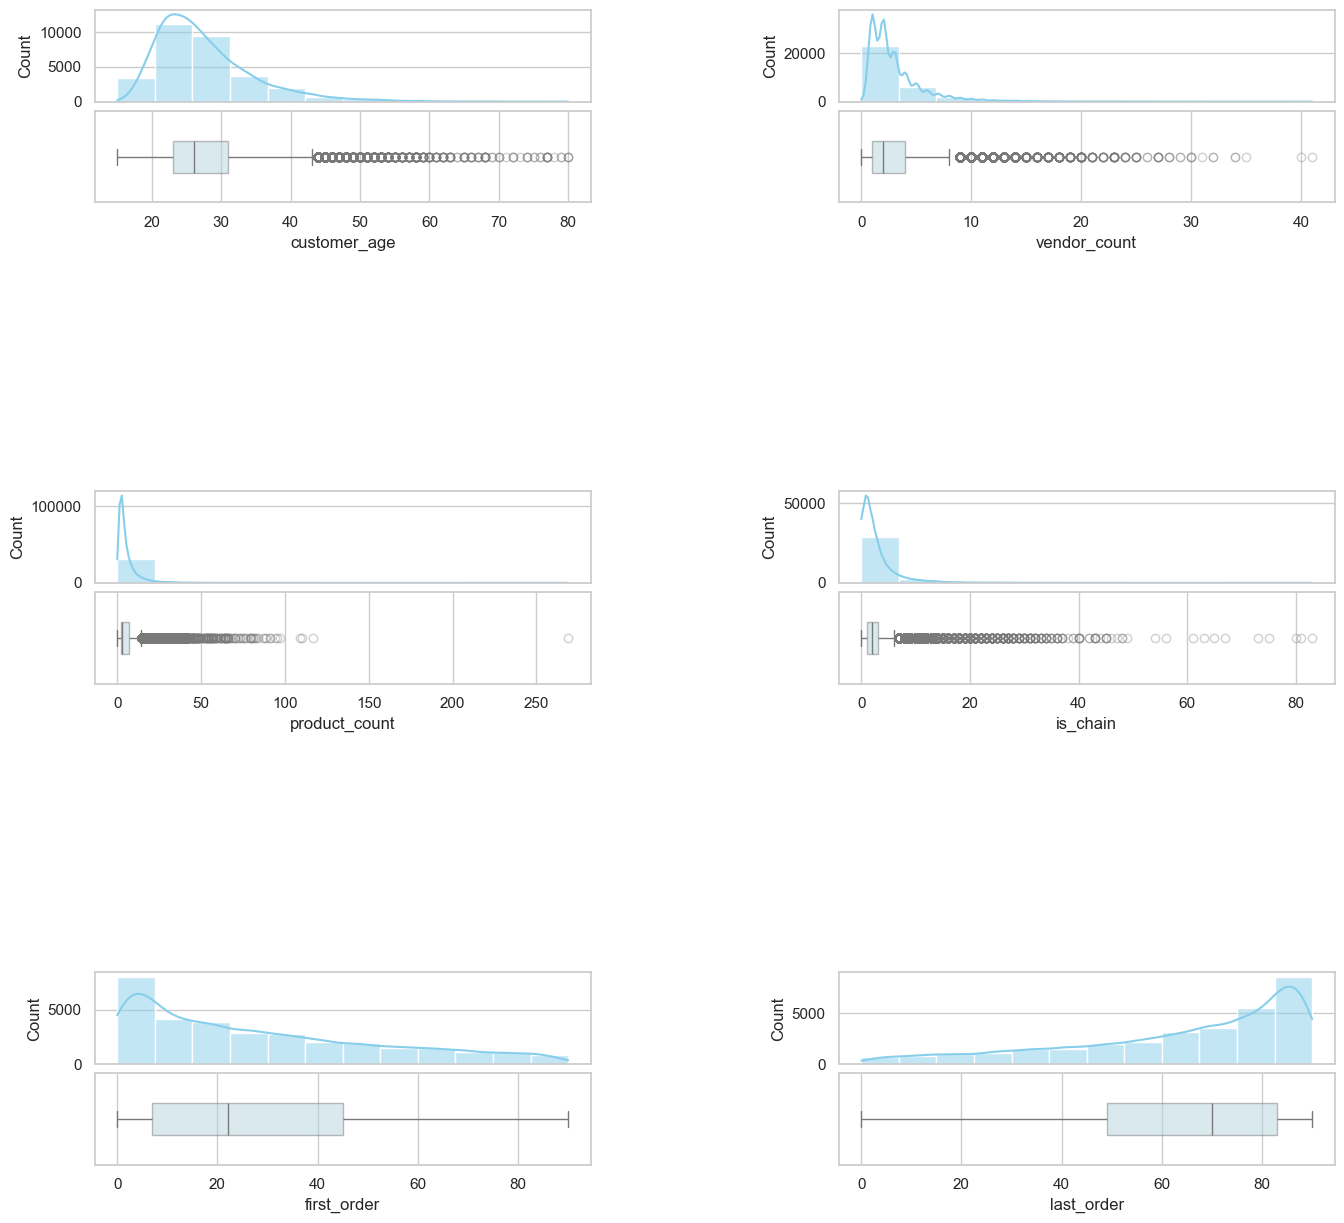

In [102]:
sns.set(style="whitegrid")
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
subset = [x for x in numericals if x not in hr_cols and x not in CUI_cols and x not in dow_cols]
len(subset)
cols = 2
rows = math.ceil(len(subset) / cols)
fig = plt.figure(figsize=(cols*8, rows*5))
outer = gridspec.GridSpec(rows, cols, wspace=0.5, hspace=1.5)
for i, feature in enumerate(subset):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            sns.histplot(df[feature], bins=12, kde=True, ax=ax, color="skyblue")
            ax.set_xticks([])
            ax.set_xlabel('')
        else:
            sns.boxplot(x=df[feature], ax=ax, color="lightblue", width=0.35,
                        boxprops=dict(alpha=0.5), flierprops = dict(marker='o', alpha=0.35))
        fig.add_subplot(ax)
fig.show()


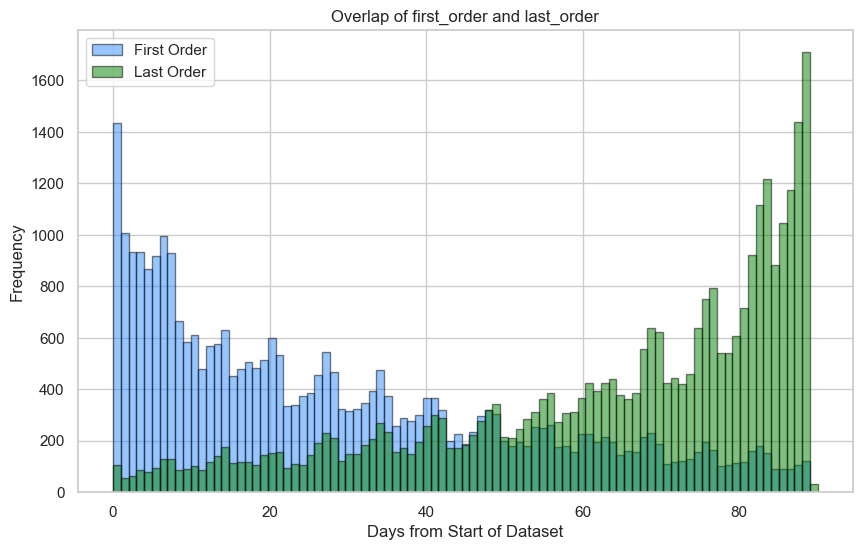

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(df.first_order, bins=91, alpha=0.5, label='First Order', color='#308dff', edgecolor='black')
plt.hist(df.last_order, bins=91, alpha=0.5, label='Last Order', color='green', edgecolor='black')
plt.xlabel('Days from Start of Dataset')
plt.ylabel('Frequency')
plt.title('Overlap of first_order and last_order')
plt.legend()
plt.show()

<Axes: >

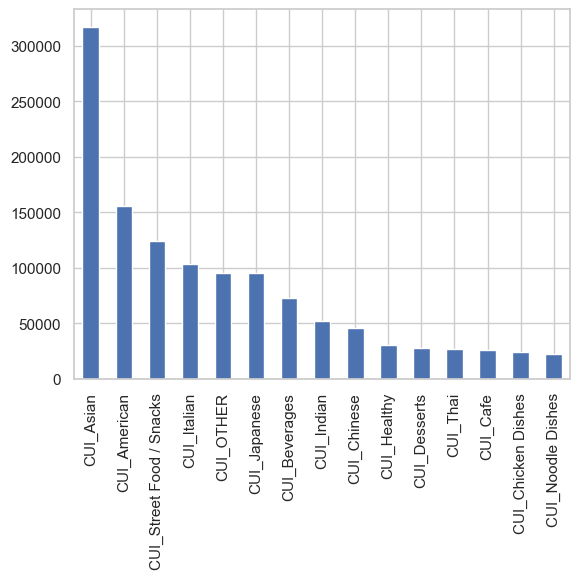

In [104]:
totals = {}
df[CUI_cols].describe().T
for col in CUI_cols:
    totals[col] = df[col].sum()
totals = pd.Series(totals)
totals.sort_values(ascending=False).plot(kind="bar")

In [105]:
cui_totals = df[CUI_cols].sum().sort_values(ascending=False)
cui_percentages = (cui_totals / cui_totals.sum()) * 100
cui_percentages

CUI_Asian                   25.995778
CUI_American                12.735594
CUI_Street Food / Snacks    10.211002
CUI_Italian                  8.446682
CUI_OTHER                    7.836714
CUI_Japanese                 7.823381
CUI_Beverages                6.001235
CUI_Indian                   4.261082
CUI_Chinese                  3.738789
CUI_Healthy                  2.482228
CUI_Desserts                 2.310222
CUI_Thai                     2.198775
CUI_Cafe                     2.092888
CUI_Chicken Dishes           2.006508
CUI_Noodle Dishes            1.859120
dtype: float64

In [106]:
# Apply log transformation and calculate descriptive statistics
#Note that when we want the original value it will be: original = np.exp(log_transformed)-1
for col in CUI_cols:
    log_transformed = np.log(df[col]+1) #+1 to avoid issues like log(0)
    print(f"Log-transformed {col}:\n{log_transformed.describe()}\n")

Log-transformed CUI_American:
count    31800.000000
mean         0.806526
std          1.223897
min          0.000000
25%          0.000000
50%          0.000000
75%          1.900987
max          5.639102
Name: CUI_American, dtype: float64

Log-transformed CUI_Asian:
count    31800.000000
mean         1.084241
std          1.508816
min          0.000000
25%          0.000000
50%          0.000000
75%          2.553344
max          6.799847
Name: CUI_Asian, dtype: float64

Log-transformed CUI_Beverages:
count    31800.000000
mean         0.391034
std          0.929486
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.439035
Name: CUI_Beverages, dtype: float64

Log-transformed CUI_Cafe:
count    31800.000000
mean         0.111034
std          0.551598
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.790266
Name: CUI_Cafe, dtype: float64

Log-transformed CUI_Chicken Dishes:
count   

In [107]:
#Calculate the percentage of zeros per cuisine
for col in CUI_cols:
    zero_orders = (df[col] == 0).mean() * 100
    print(f"% of customers who never ordered {col}: {zero_orders:.2f}%")

% of customers who never ordered CUI_American: 66.07%
% of customers who never ordered CUI_Asian: 62.59%
% of customers who never ordered CUI_Beverages: 82.92%
% of customers who never ordered CUI_Cafe: 95.70%
% of customers who never ordered CUI_Chicken Dishes: 89.79%
% of customers who never ordered CUI_Chinese: 88.92%
% of customers who never ordered CUI_Desserts: 93.66%
% of customers who never ordered CUI_Healthy: 93.18%
% of customers who never ordered CUI_Indian: 89.16%
% of customers who never ordered CUI_Italian: 79.72%
% of customers who never ordered CUI_Japanese: 80.19%
% of customers who never ordered CUI_Noodle Dishes: 93.00%
% of customers who never ordered CUI_OTHER: 77.86%
% of customers who never ordered CUI_Street Food / Snacks: 86.65%
% of customers who never ordered CUI_Thai: 92.52%


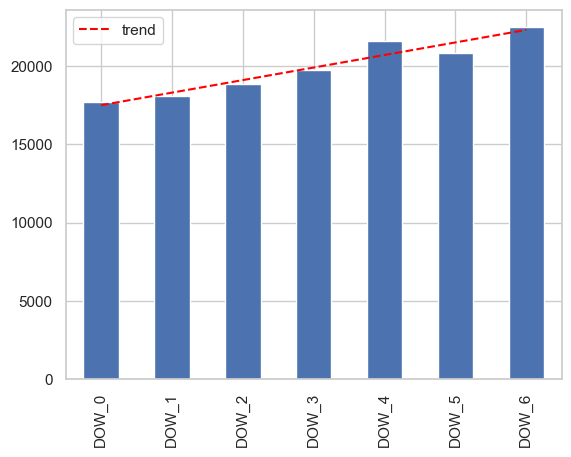

In [108]:
dof = {}
for col in dow_cols:
    dof[col] = df[col].sum()
dof = pd.Series(dof)
x = np.arange(len(dof))
y = dof.values
m, b = np.polyfit(x, y, 1) # linear regression; m = slope; b = intercept
dof.plot(kind="bar")
plt.plot(x, m*x + b, color="red", linestyle="--", label="trend")
plt.legend()

<Axes: >

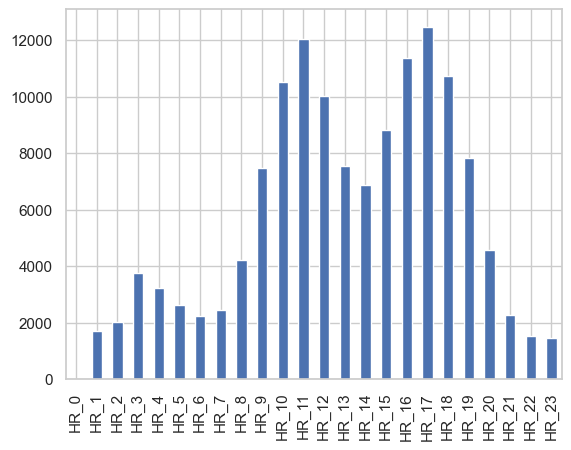

In [109]:
hours = {}
hr_cols = [col for col in df.columns if "HR" in col]
df[hr_cols].describe().T
for col in hr_cols:
    hours[col] = df[col].sum()
hours = pd.Series(hours)
hours.plot(kind="bar")

<h2 id='categorical'>2.2 Categorical variables</h2>

In [110]:
df.describe(include="object").T

,count,unique,top,freq
customer_id,31800,31800,1b8f824d5e,1
customer_region,31358,8,8670,9686
last_promo,31800,4,NO PROMO,16716
payment_method,31800,3,CARD,20127


In [111]:
df.set_index("customer_id", inplace=True)

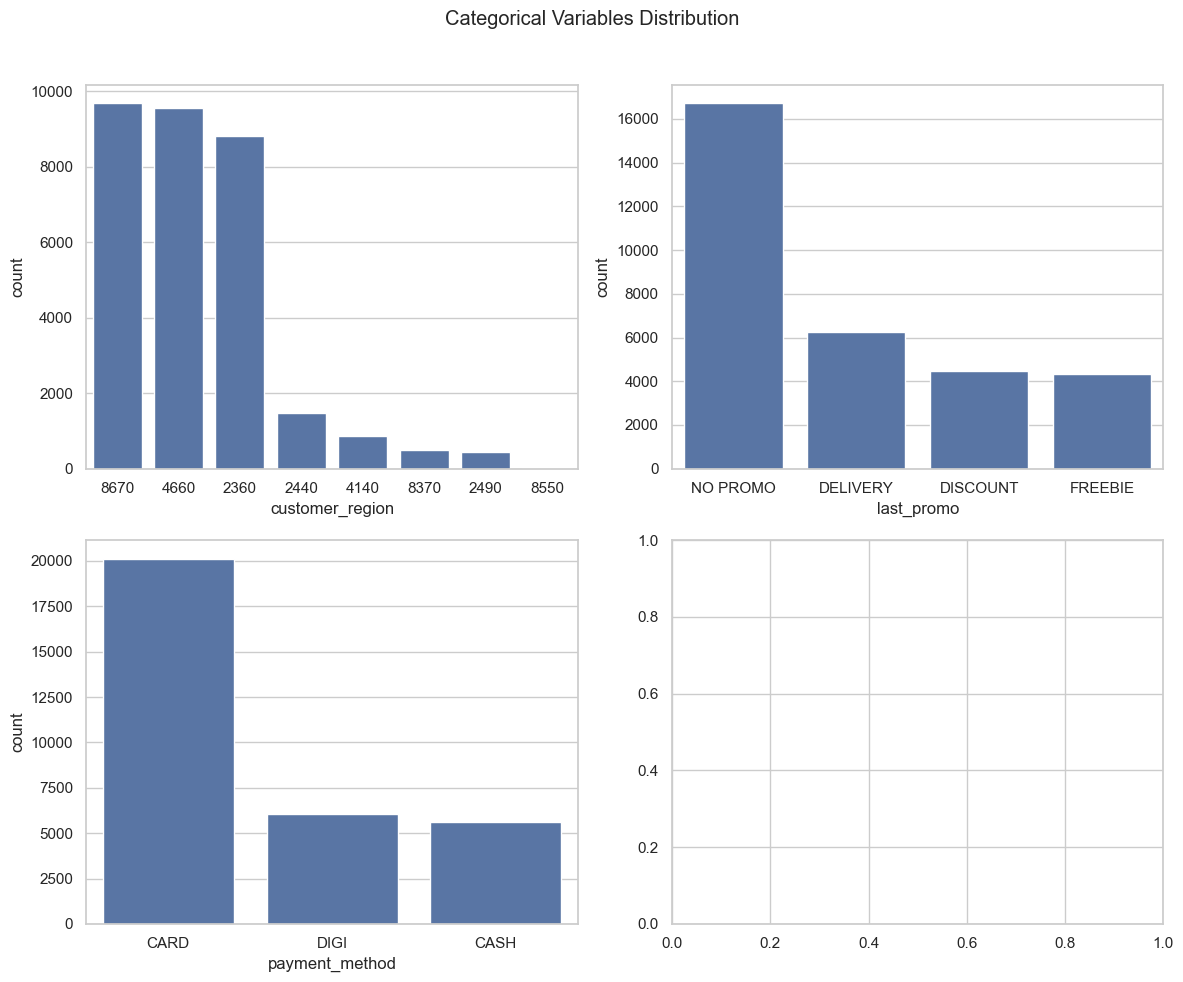

In [112]:
cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]

cols = 2
rows = math.ceil(len(cat_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
for ax, feat in zip(axes.flatten(), cat_cols):
    order = df[feat].value_counts().index
    sns.countplot(x=feat, data=df, ax=ax, order=order)
plt.suptitle("Categorical Variables Distribution")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [113]:
#Percentage for payment method
df['payment_method'].value_counts(normalize=True) * 100

payment_method
CARD    63.292453
DIGI    19.100629
CASH    17.606918
Name: proportion, dtype: float64

In [114]:
#Calculate the number and percentages of customer region
region_counts = df['customer_region'].value_counts()

region_percentages = df['customer_region'].value_counts(normalize=True) * 100

region_summary = pd.DataFrame({
    'Count': region_counts,
    'Percentage': region_percentages
})
region_summary['Percentage'] = region_summary['Percentage'].round(2)
region_summary

,Count,Percentage
customer_region,,
8670,9686,30.89
4660,9550,30.45
2360,8829,28.16
2440,1483,4.73
4140,857,2.73
8370,495,1.58
2490,445,1.42
8550,13,0.04


<h1 id='data-preprocessing'>3. Data preprocessing</h1>

<h2>3.1 Missing Values</h2>

In [115]:
missing_data(df)

,Missing Count,Missing %
HR_0,1164,3.66
customer_age,727,2.29
customer_region,442,1.39
first_order,106,0.33


<h3>3.1.1 First Order</h3>

> Impute using total_orders taht is calculated by addig up the dow columns.

In [116]:
df["total_orders"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)

df[df.first_order.isna()].total_orders.value_counts()

df[(df.total_orders == 1) & (df.first_order > 1)][["first_order", "last_order", "total_orders"]]

df["first_order"] = np.where(df.first_order.isna(), df.last_order, df.first_order)
df.drop(columns=["total_orders"], inplace=True)

df.first_order.isna().sum()


0

<h3>3.1.2 HR_0</h3>

> Imputed by calculating the difference between total_hours and total_days

In [117]:
# Creathe column total_hours and total_days
df["total_hours"] = df[hr_cols].apply(lambda x: x.sum(), axis=1)
df["total_days"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)

In [118]:
# Use the created columns to impute HR_0
df["HR_0"] = np.where(df.HR_0.isna(), df.total_days - df.total_hours, df.HR_0)

# Drop the created columns
df.drop(columns=["total_hours", "total_days"], inplace=True)

# Check if there are still missing values
df.HR_0.isna().sum()

0

<h3>3.1.3 Customer Age and Region</h3>

> Let's impute customer age and region with KNN imputer. 

> Note that it is necessart to label encode costumer_region and then after imputing map it back.

> ADICIONAR

In [80]:
# Round the age 
df["customer_age"] = df["customer_age"].round().astype(int)

> Let's take a look and see if we still hvae missing values

In [81]:
missing_data(df)

,Missing Count,Missing %
CUI_Cafe_log,30349,95.73
CUI_Desserts_log,29696,93.67
CUI_Healthy_log,29543,93.19
CUI_Noodle Dishes_log,29493,93.03
CUI_Thai_log,29342,92.55
CUI_Chicken Dishes_log,28475,89.82
CUI_Indian_log,28268,89.17
CUI_Chinese_log,28200,88.95
CUI_Street Food / Snacks_log,27468,86.64
CUI_Beverages_log,26295,82.94


<h2> 3.2 Data types</h2>

In [44]:
df.dtypes

customer_region              object
customer_age                  int32
vendor_count                float64
product_count               float64
is_chain                    float64
first_order                 float64
last_order                  float64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                       float64
DOW_1                       float64
DOW_2                       float64
DOW_3                       

> Where is float should be int, except for CUI because that's a monetary unit.

In [45]:
to_int = ['vendor_count','product_count','is_chain','first_order','last_order'] + hr_cols + dow_cols
df[to_int] = df[to_int].astype(int)
df.dtypes

customer_region              object
customer_age                  int32
vendor_count                  int32
product_count                 int32
is_chain                      int32
first_order                   int32
last_order                    int32
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int32
DOW_1                         int32
DOW_2                         int32
DOW_3                       

<h2>3.3 Outlier Removal</h2>

> From the univariate analysis we could see that the variables that may have outliers that need to be removed are: <code>customer_age</code>,<code>vendor_count</code>,<code>product_count</code> and <code>is_chain</code>

In [46]:
columns_with_outliers = ['customer_age','vendor_count','product_count','is_chain']

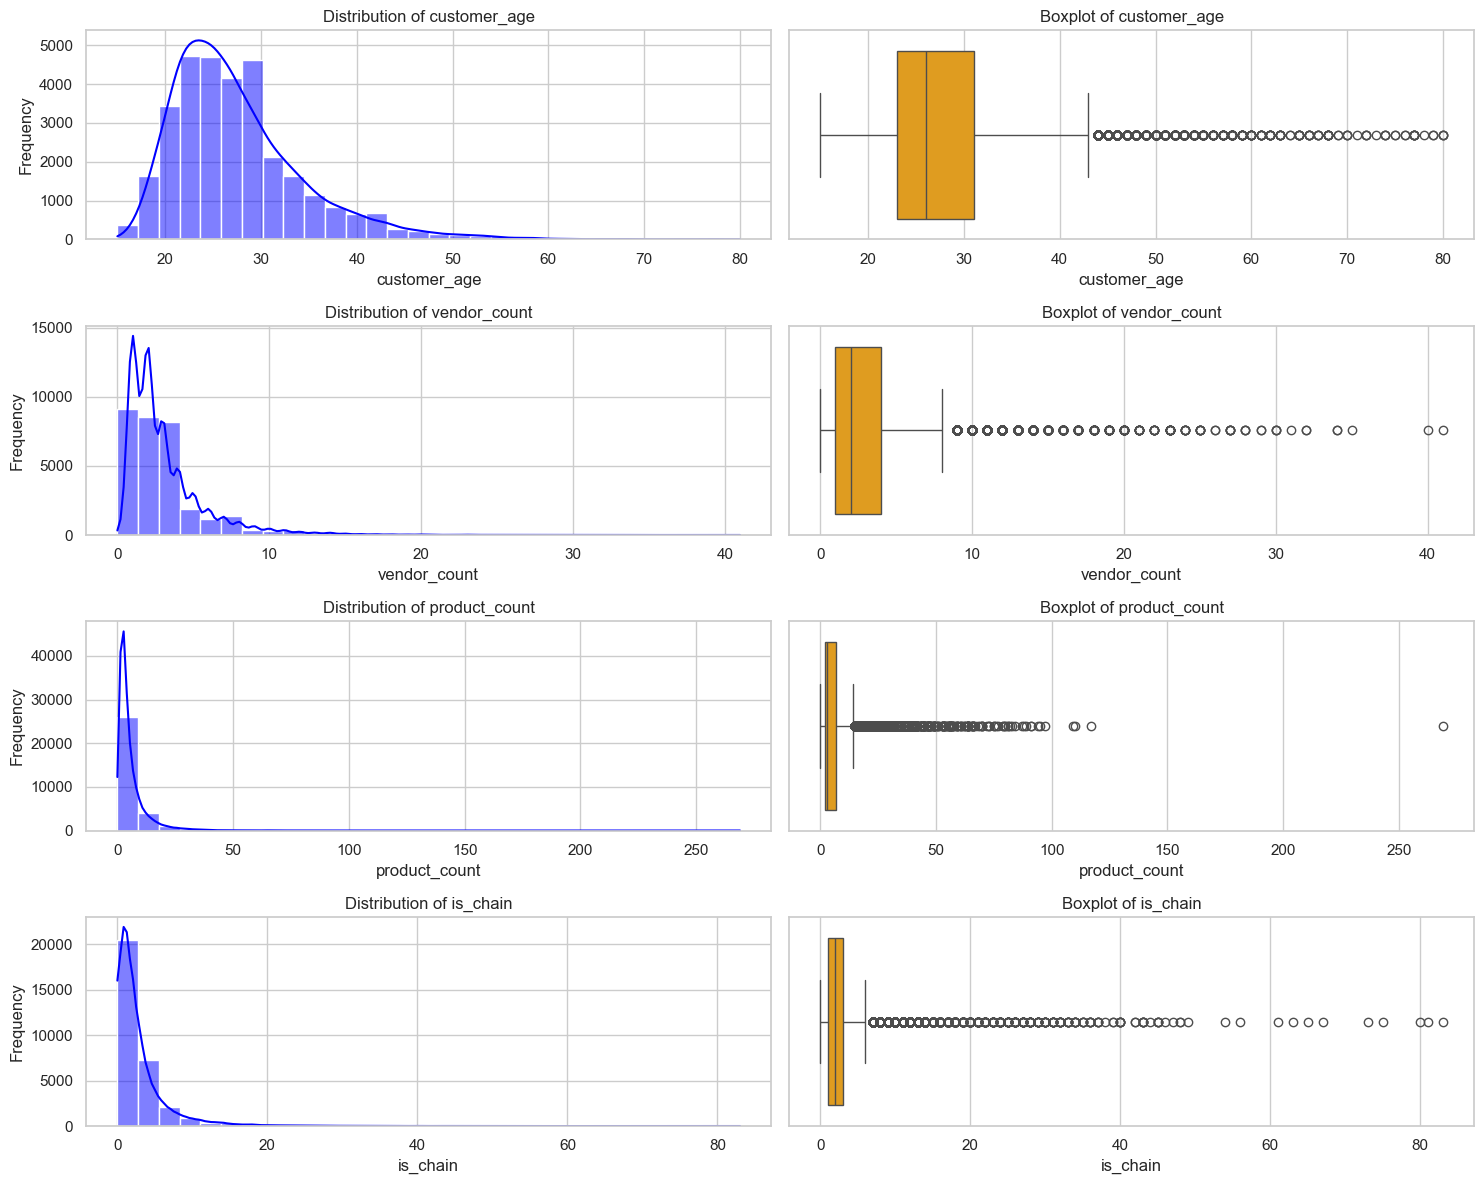

In [47]:

plt.figure(figsize=(15, len(columns_with_outliers) * 3))

for i, column in enumerate(columns_with_outliers):
    # Distribution plot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


<h3>3.3.1 Outlier Removal with IQR</h3>

In [48]:
iqr_df = remove_outliers_iqr(df,columns_with_outliers,4)

Upper Bound for customer_age: 63.0
Lower Bound for customer_age: -9.0
--------------------------------------------------
Upper Bound for vendor_count: 16.0
Lower Bound for vendor_count: -11.0
--------------------------------------------------
Upper Bound for product_count: 27.0
Lower Bound for product_count: -18.0
--------------------------------------------------
Upper Bound for is_chain: 11.0
Lower Bound for is_chain: -7.0
--------------------------------------------------
Rows removed for each:{'customer_age': 54, 'vendor_count': 165, 'product_count': 416, 'is_chain': 638}
Total removed:1273
Percentage removed:4.0031%


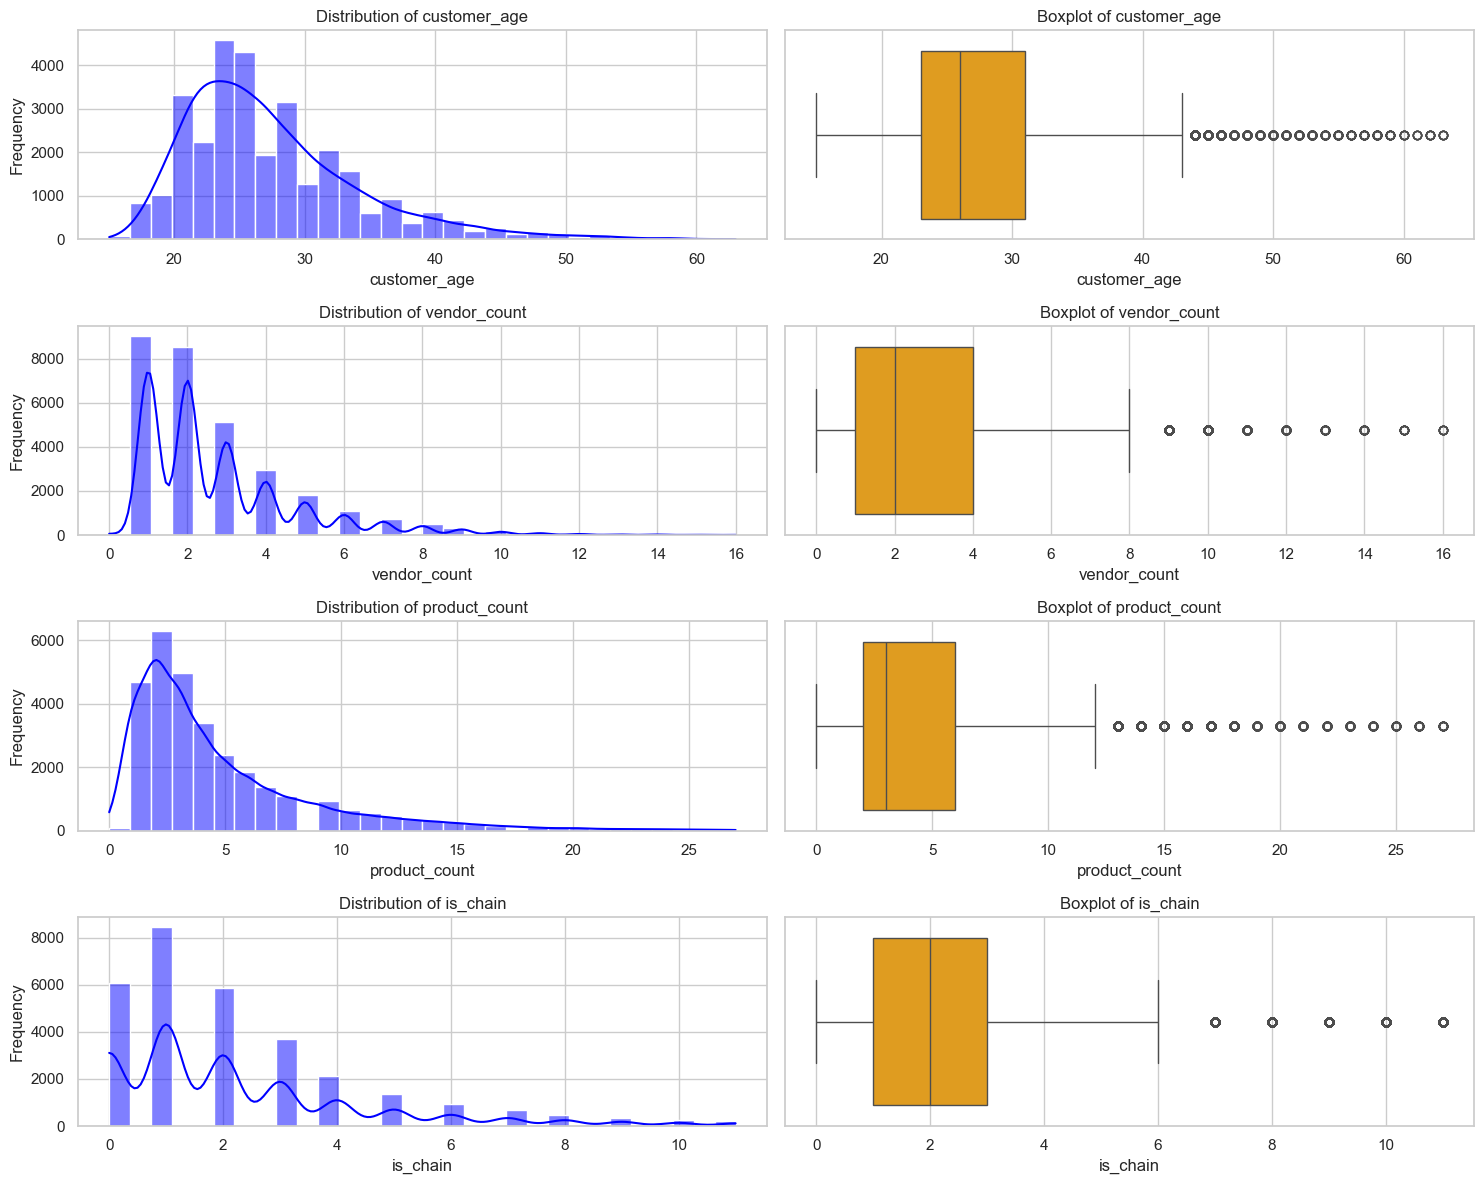

In [49]:
# Plot df after IQR removal of outliers with threshold 4
plt.figure(figsize=(15, len(columns_with_outliers) * 3))

for i, column in enumerate(columns_with_outliers):
    # Distribution plot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 1)
    sns.histplot(iqr_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 2)
    sns.boxplot(x=iqr_df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


> Seems to be too aggressive even with threshold of 4.

<h3>3.3.2 Outlier Removal with Percentile</h3>

In [75]:
percentile_df = remove_outliers_percentile(df,columns_with_outliers,1,upper_percentile=99)

Upper Bound for customer_age: 52.0
Lower Bound for customer_age: 17.0
--------------------------------------------------
Upper Bound for vendor_count: 14.0
Lower Bound for vendor_count: 1.0
--------------------------------------------------
Upper Bound for product_count: 28.0
Lower Bound for product_count: 1.0
--------------------------------------------------
Upper Bound for is_chain: 14.0
Lower Bound for is_chain: 0.0
--------------------------------------------------
Rows removed for each: {'customer_age': 369, 'vendor_count': 240, 'product_count': 323, 'is_chain': 228}
Total removed: 1160
Percentage removed: 3.659%


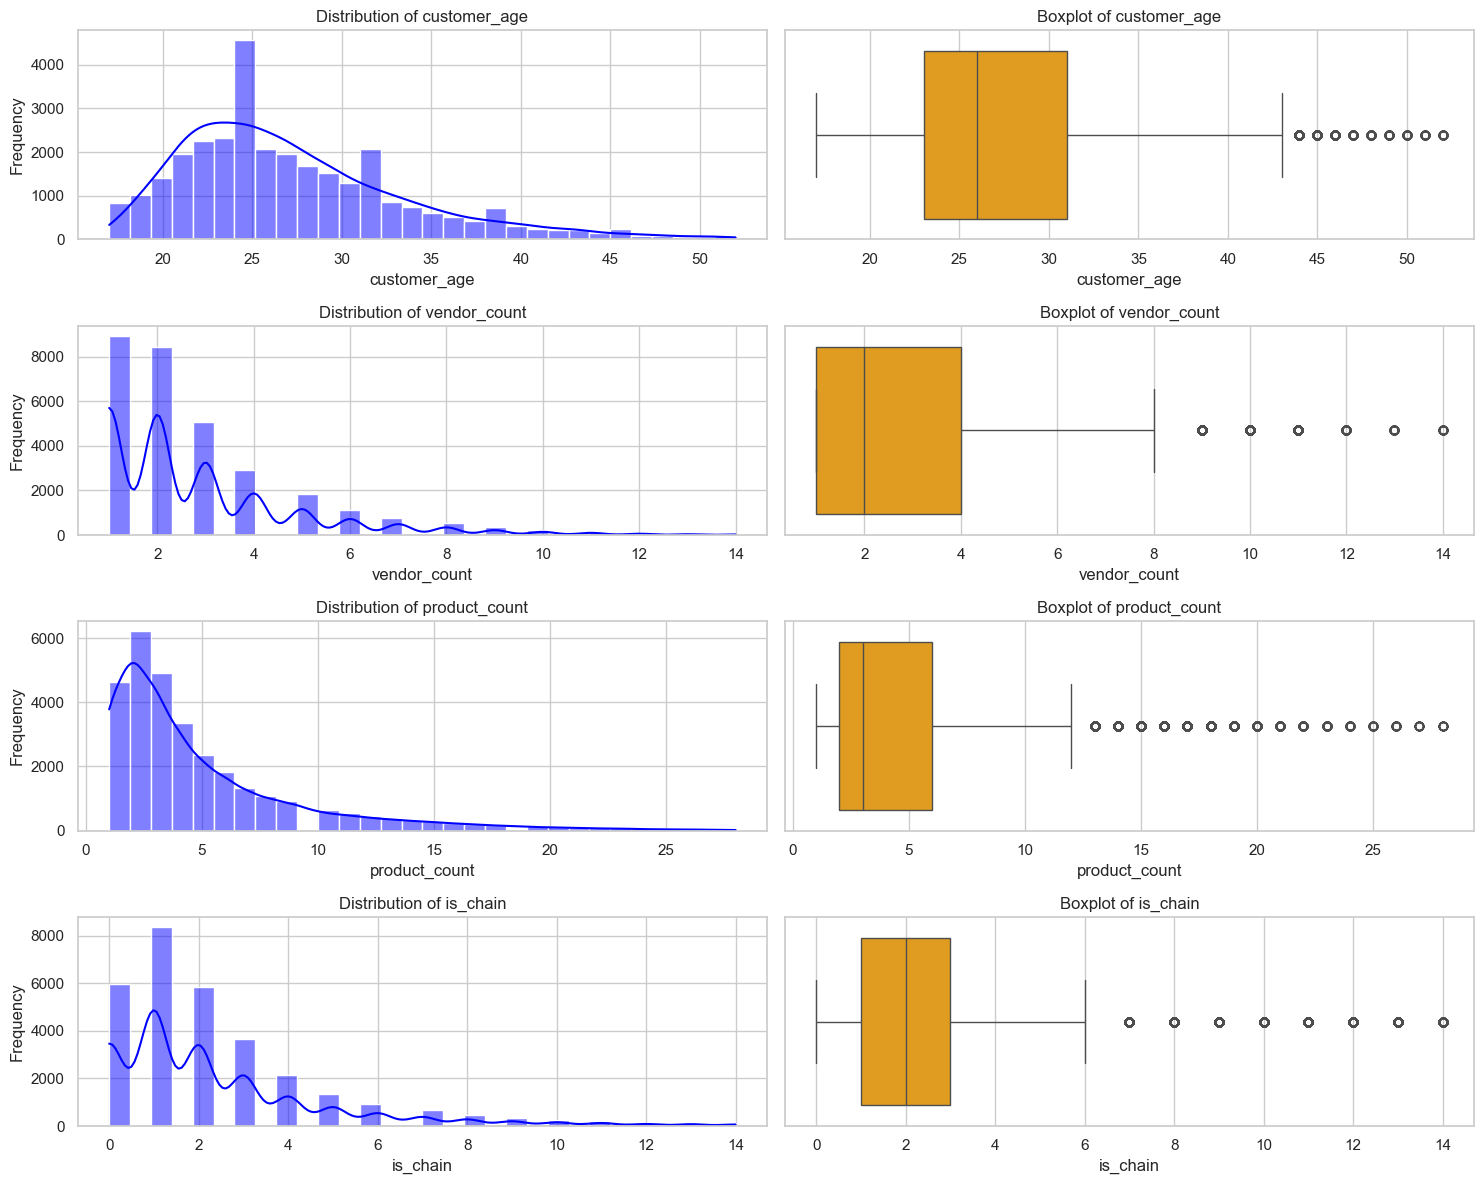

In [76]:
# Plot df after removing outliers above 99.9 percentile
plt.figure(figsize=(15, len(columns_with_outliers) * 3))

for i, column in enumerate(columns_with_outliers):
    # Distribution plot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 1)
    sns.histplot(percentile_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 2)
    sns.boxplot(x=percentile_df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



<h3>3.3.3 Outlier Removal with DBScan</h3>

> Change min_samples for more outliers to be removed ?

In [78]:
dbscan_df = remove_outliers_dbscan(df, columns_with_outliers, eps=0.1, min_samples=20)

Outliers in customer_age: 133
Outliers in vendor_count: 66
Outliers in product_count: 204
Outliers in is_chain: 106

Total rows removed: 509
Percentage of data removed: 1.6055%

Value after removing outliers:
Maximum value in customer_age: 80
Minimum value in customer_age: 15
--------------------------------------------------
Maximum value in vendor_count: 30
Minimum value in vendor_count: 1
--------------------------------------------------
Maximum value in product_count: 117
Minimum value in product_count: 0
--------------------------------------------------
Maximum value in is_chain: 26
Minimum value in is_chain: 0
--------------------------------------------------


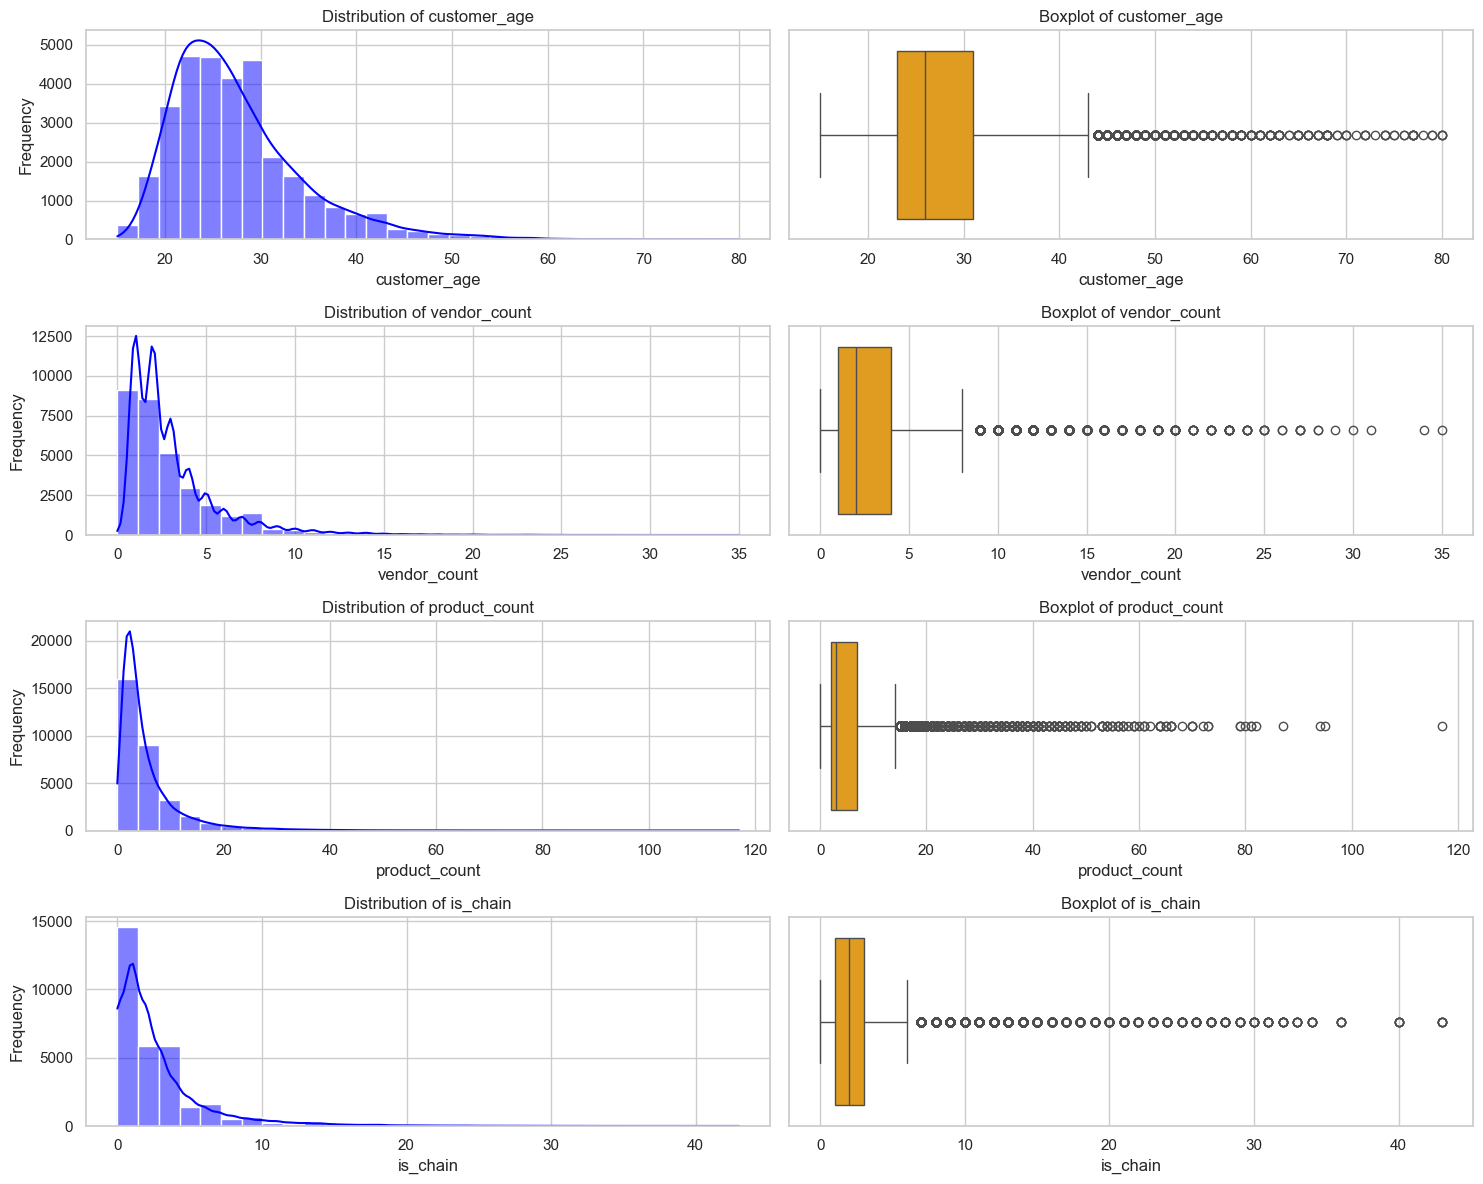

In [53]:
# Plot df after outlier removal with DBScan
plt.figure(figsize=(15, len(columns_with_outliers) * 3))

for i, column in enumerate(columns_with_outliers):
    # Distribution plot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 1)
    sns.histplot(dbscan_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(columns_with_outliers), 2, 2 * i + 2)
    sns.boxplot(x=dbscan_df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



> DBScan outliers removal seems to be the best option.

In [54]:
df = dbscan_df.copy()

<h2 id='feature-engineering'>3.4 Feature engineering</h2>

<h3 id='numerical-new'> 3.4.1 Numerical new features</h3>

In [55]:
df["total_orders"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)
df["percentage_chain"] = np.where(df.product_count == 0, 0, df.is_chain / df.total_orders * 100)
df["customer_lifetime"] = df.last_order - df.first_order
df["order_freq"] = np.where(df.customer_lifetime== 0, 0, df.total_orders / (df.customer_lifetime / 7))
df["avg_time_between_orders"] = np.where(df.total_orders == 0, 0, df.customer_lifetime / df.total_orders)
df["total_spent"] = df[CUI_cols].apply(lambda x: x.sum(), axis=1)
# df["total_spent_log"] = np.where(df.total_spent == 0, np.nan, np.log(df.total_spent))
df["total_spent_log"] = np.log(df["total_spent"] + 1) 
df["avg_order_value"] = np.where(df.total_orders == 0, 0, df.total_spent / df.total_orders)

In [56]:
new_features_numerical = ['total_orders','percentage_chain','customer_lifetime','order_freq','avg_time_between_orders','total_spent','total_spent_log','avg_order_value']

In [57]:
new_numerical_cols = list(df.columns)[-8:]
df[new_numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
total_orders,31766.0,4.323522,4.769288,0.0,2.000000,3.000000,5.000000,90.000000
percentage_chain,31766.0,62.537433,38.781052,0.0,33.333333,71.428571,100.000000,100.000000
customer_lifetime,31766.0,35.326040,29.390759,0.0,3.000000,34.000000,62.000000,90.000000
order_freq,31766.0,0.976196,1.820403,0.0,0.245614,0.583333,1.037037,28.000000
avg_time_between_orders,31766.0,8.467583,7.892647,0.0,1.287815,7.111111,12.666667,44.500000
total_spent,31766.0,38.122234,45.203303,0.0,12.950000,24.150000,44.937500,907.860000
total_spent_log,31766.0,3.241708,0.916364,0.0,2.635480,3.224858,3.827282,6.812191
avg_order_value,31766.0,10.291332,7.869666,0.0,5.053333,8.212083,12.915000,104.320000


> There are rows where the total order is zero: we should remove those

In [58]:
# drop the 138 cases with 0 orders
df = df[df["total_orders"] > 0]

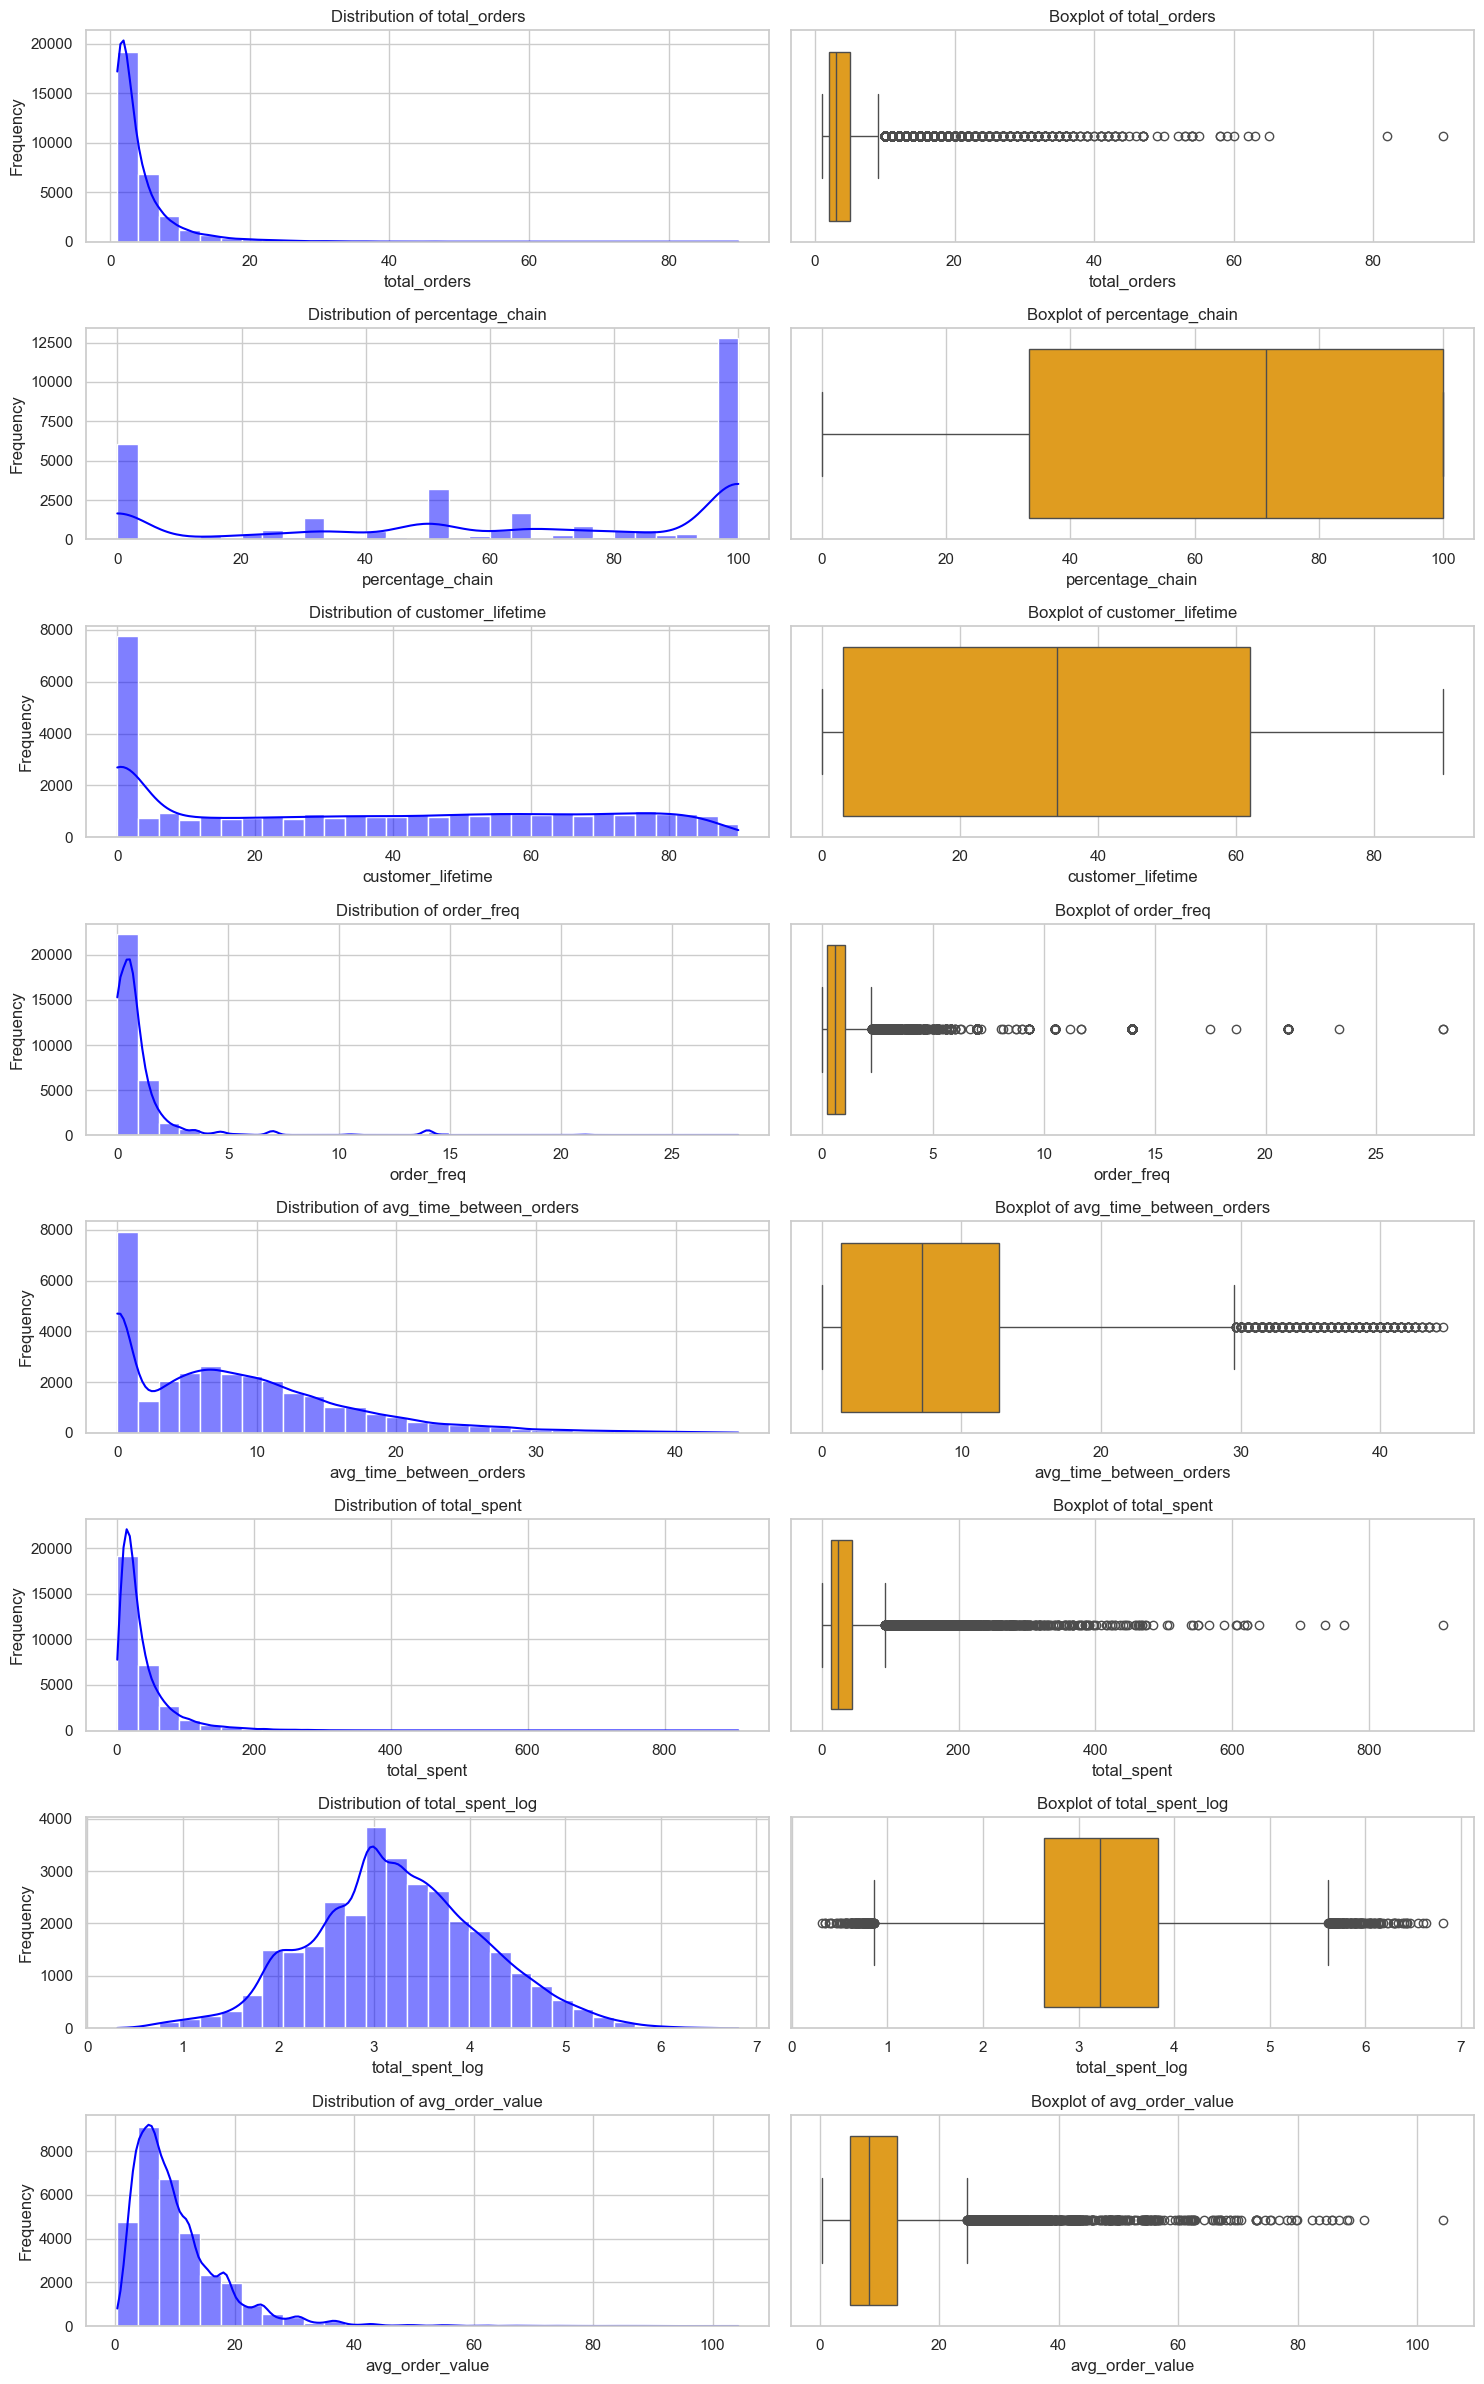

In [59]:
# Plot new features
plt.figure(figsize=(15, len(new_numerical_cols) * 3))

for i, column in enumerate(new_numerical_cols):
    # Distribution plot
    plt.subplot(len(new_numerical_cols), 2, 2 * i + 1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(new_numerical_cols), 2, 2 * i + 2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



In [60]:
# sns.set(style="whitegrid")
# numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
# subset = numericals[-8:]
# len(subset)
# cols = 2
# rows = math.ceil(len(subset) / cols)
# fig = plt.figure(figsize=(13, 25))
# outer = gridspec.GridSpec(rows, cols, wspace=0.5, hspace=1.5)
# for i, feature in enumerate(subset):
#     inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
#     for j in range(2):
#         ax = plt.Subplot(fig, inner[j])
#         if j == 0:
#             sns.histplot(df[feature], bins=12, kde=True, ax=ax, color="skyblue")
#             ax.set_xticks([])
#             ax.set_xlabel('')
#         else:
#             sns.boxplot(x=df[feature], ax=ax, color="lightblue", width=0.35,
#                         boxprops=dict(alpha=0.5), flierprops = dict(marker='o', alpha=0.35))
#         fig.add_subplot(ax)
# fig.show()

In [61]:
for col in CUI_cols:
    df[col+"_log"] = df[col].apply(lambda x: np.log(x) if x > 0 else np.nan)

df.columns
CUI_log_cols = [col for col in df.columns if "CUI" in col and "log" in col]
CUI_log_cols

['CUI_American_log',
 'CUI_Asian_log',
 'CUI_Beverages_log',
 'CUI_Cafe_log',
 'CUI_Chicken Dishes_log',
 'CUI_Chinese_log',
 'CUI_Desserts_log',
 'CUI_Healthy_log',
 'CUI_Indian_log',
 'CUI_Italian_log',
 'CUI_Japanese_log',
 'CUI_Noodle Dishes_log',
 'CUI_OTHER_log',
 'CUI_Street Food / Snacks_log',
 'CUI_Thai_log']

In [62]:
#Percentage of customers with lifetime=0
(df['customer_lifetime']==0).sum()/df.shape[0]

0.22568842065419675

In [63]:
# % of customers with avg_time_between_order>30
(df["avg_time_between_orders"]>30).sum()/df.shape[0]

0.018389426868119736

<h3 id='categorical-new'> 3.4.2 Categorical new features</h3>

In [64]:
df["last_promo"] = np.where(df.last_promo == "-", "No promo", df.last_promo)
df["promo_used"] = df.last_promo.apply(lambda x: False if x == "No promo" else True)
df["favorite_cuisine"] = df[CUI_cols].idxmax(axis=1).apply(lambda x: x.split("_")[1])
df["active_customer"] = np.where((df.last_order >= 60), True, False)
df["recent_customer"] = np.where((df.first_order >= 60), True, False)
df["churning_customer"] = np.where((df.last_order < 60), True, False)
df["customer_activity"] = np.where((df.churning_customer == True), "Churning",
                                   np.where((df.recent_customer == True), "Recent", "Active"))
df.drop(columns=["active_customer", "recent_customer", "churning_customer"], inplace=True)
df["most_freq_day"] = df[dow_cols].idxmax(axis=1).apply(lambda x: x.split("_")[1])
df["most_freq_day"] = df["most_freq_day"].replace({"0": "Sun", "1":
    "Mon", "2": "Tue", "3": "Wed", "4": "Thu", "5": "Fri", "6": "Sat"})
df["most_freq_hour"] = df[hr_cols].idxmax(axis=1).apply(lambda x: x.split("_")[1])


C:\Users\emano\AppData\Local\Temp\ipykernel_15308\2232485884.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


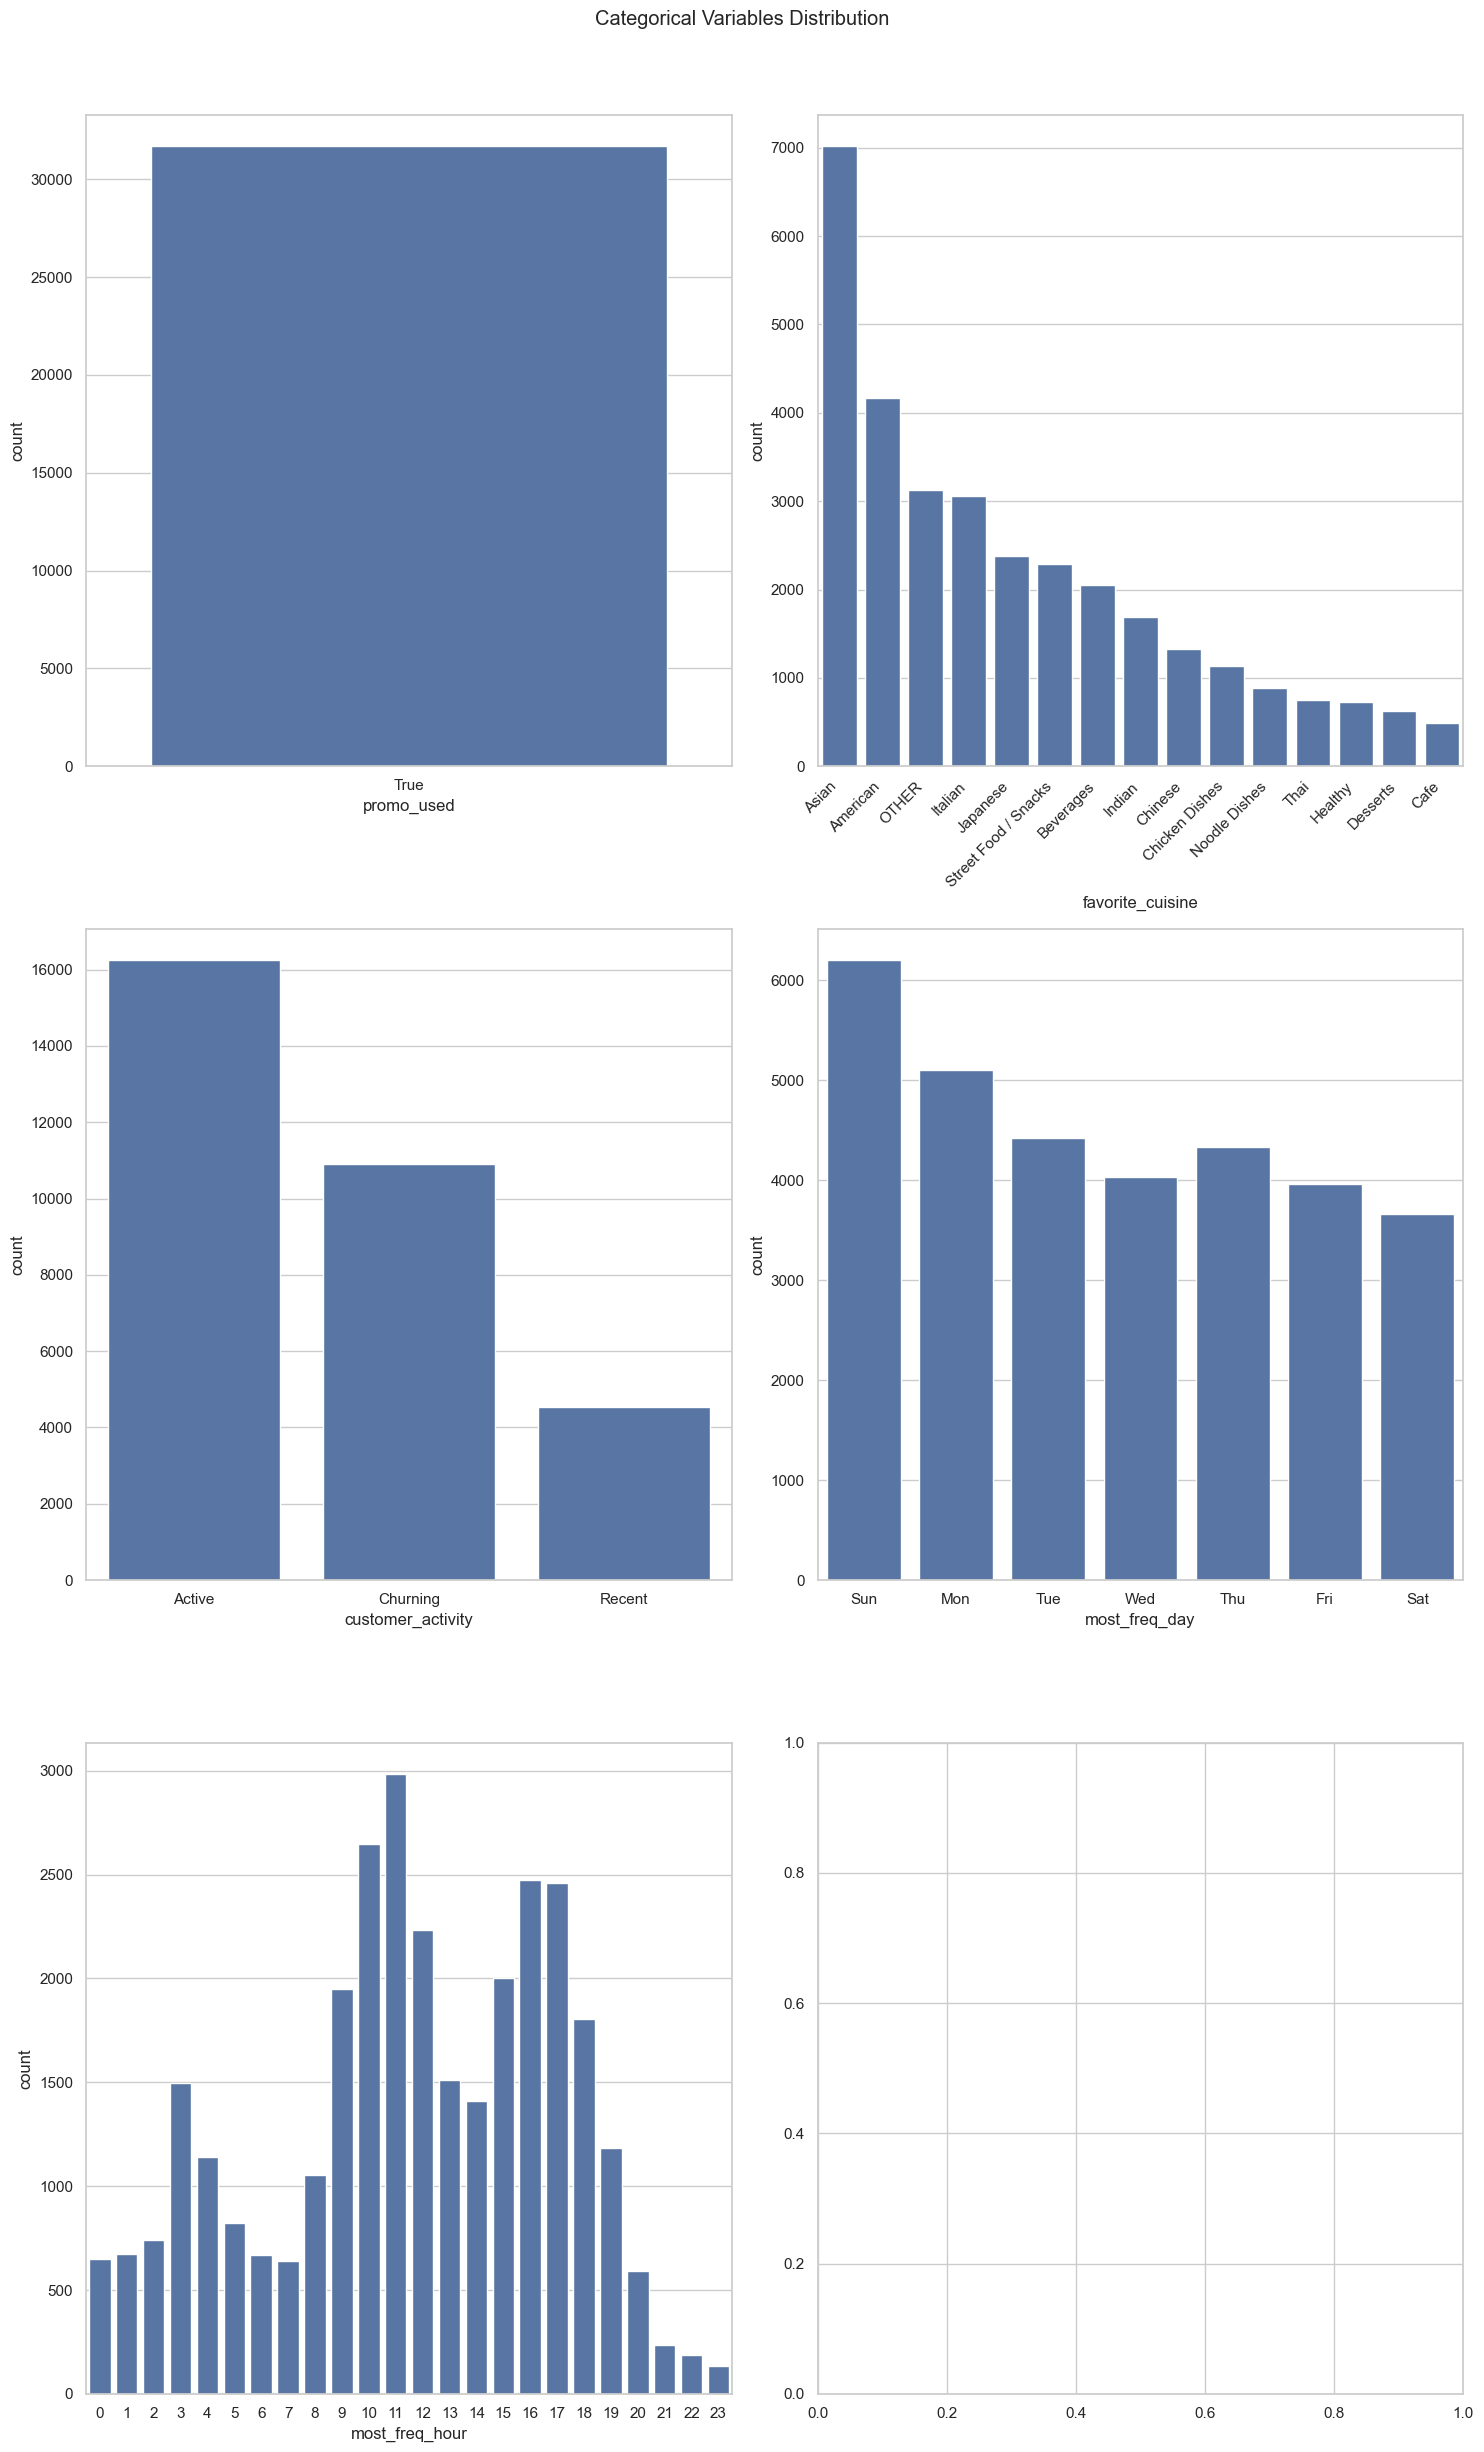

In [65]:
sns.set(style="whitegrid")
cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]
subset = cat_cols[-5:]
cols = 2
rows = math.ceil(len(subset) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))
for ax, feat in zip(axes.flatten(), subset):
    if feat == "most_freq_hour":
        order = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
                 "11", "12", "13", "14", "15", "16", "17", "18",
                 "19", "20", "21", "22", "23"]
    elif feat == "most_freq_day":
        order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    else:
        order = df[feat].value_counts().index
    sns.countplot(x=feat, data=df, ax=ax, order=order)
    if feat == "favorite_cuisine":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
title = "Categorical Variables Distribution"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [66]:
# Calculate the percentage of each day in the 'favorite_day' variable
favorite_day_percentage = (df['most_freq_day'].value_counts(normalize=True) * 100).round(0)

# Display the percentages
print(favorite_day_percentage)

# Calculate the percentage of each hour in the 'favorite_hour' variable
favorite_hour_percentage = (df['most_freq_hour'].value_counts(normalize=True) * 100).sort_index().round(0)

# Display the percentages
print(favorite_hour_percentage)

most_freq_day
Sun    20.0
Mon    16.0
Tue    14.0
Thu    14.0
Wed    13.0
Fri    12.0
Sat    12.0
Name: proportion, dtype: float64
most_freq_hour
0     2.0
1     2.0
10    8.0
11    9.0
12    7.0
13    5.0
14    4.0
15    6.0
16    8.0
17    8.0
18    6.0
19    4.0
2     2.0
20    2.0
21    1.0
22    1.0
23    0.0
3     5.0
4     4.0
5     3.0
6     2.0
7     2.0
8     3.0
9     6.0
Name: proportion, dtype: float64


<h2 id='outlier-removal'> 3.5 Outliers Removal of New Features</h3>

> We should check for outliers in total_orders, order_frequency and total_spent as well as the log.

<h3>3.5.1 Z-score Outlier Removal for total_spent</h3>

> By removing the outliers in log of total spent we are already removing the ones from total_spent too.

In [142]:
df_zscore = remove_outliers_zscore(df,'total_spent_log')

Total outliers in column total_spent_log: 58
Percentage of data removed: 0.1829%


<h3>3.5.2 Outlier Removal with DBScan</h3>

In [67]:
teste = remove_outliers_dbscan(df,new_features_numerical)

Outliers in total_orders: 30
Outliers in percentage_chain: 12
Outliers in customer_lifetime: 2
Outliers in order_freq: 8
Outliers in avg_time_between_orders: 0
Outliers in total_spent: 221
Outliers in total_spent_log: 0
Outliers in avg_order_value: 34

Total rows removed: 307
Percentage of data removed: 0.9684%

Value after removing outliers:
Maximum value in total_orders: 90
Minimum value in total_orders: 1
--------------------------------------------------
Maximum value in percentage_chain: 100.0
Minimum value in percentage_chain: 0.0
--------------------------------------------------
Maximum value in customer_lifetime: 90
Minimum value in customer_lifetime: 0
--------------------------------------------------
Maximum value in order_freq: 28.0
Minimum value in order_freq: 0.0
--------------------------------------------------
Maximum value in avg_time_between_orders: 44.5
Minimum value in avg_time_between_orders: 0.0
--------------------------------------------------
Maximum value in

<h1 id='multivariate'>4. Multivariate analysis</h1>

<h3 id='numerical-numerical'>4.1 Numericals vs. Numericals</h3>

<h4>Correlation matrix</h4>

In [ ]:
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
numericals.remove("last_order")
numericals.remove("first_order")
numericals.remove("total_spent")

subset = [x for x in numericals if x not in CUI_log_cols]
subset.remove("product_count")
subset.remove("vendor_count")
corr = df[subset].corr(method='spearman')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (30,20))
sns.heatmap(cor_mat_lower[(abs(cor_mat_lower) >= 0.2)],
            annot=True,
            cmap='PiYG',
            center=0);

In [54]:
df.drop(columns=["is_chain"], inplace=True)
numericals.remove("is_chain")

In [ ]:
corr = df[CUI_cols].corr(method='spearman')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (25,16))
sns.heatmap(cor_mat_lower[abs(cor_mat_lower) > 0.15],
            annot=True, cmap='PiYG',
            center=0)
            #cmap='RdBu_r');
# corr chine e noodle
# corr entre cafe e other

In [ ]:
# corr entre dias
corr = df[dow_cols].corr(method='spearman')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (25,16))
sns.heatmap(cor_mat_lower[abs(cor_mat_lower) > 0.15],
            annot=True,
            cmap='PiYG',
            center=0);
# correlacao ligeiramente maior se comprar no domingo compra na segunda
# se comprar na segunda compra na terca

In [ ]:
# ver correlacao entre horas
corr = df[hr_cols].corr(method='pearson')
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)
plt.figure(figsize = (25,16))
sns.heatmap(cor_mat_lower[abs(cor_mat_lower) > 0.15],
            annot=True,
            cmap='PiYG',
            center=0);
# correlacao com horas previas
# correlacao horas de almoco e jantar


<h4>Pairplots</h4>

In [ ]:
subset = [x for x in numericals if x not in hr_cols and x not in CUI_cols and x not in dow_cols and x not in CUI_log_cols]
subset.remove("product_count")
subset.remove("vendor_count")
sns.pairplot(df[subset],
             diag_kind='kde',
             markers='o',
             palette='husl',
             plot_kws={'alpha':0.5},
             diag_kws={'alpha':0.5, 'color':'green'},
             corner=True)

In [59]:
def hexbin_with_details(x, y, **kwargs):
    ax = plt.gca()
    cmap = kwargs.pop('cmap', 'Greys')
    gridsize = kwargs.pop('gridsize', 30)
    hb = ax.hexbin(x, y, gridsize=gridsize, cmap=cmap, mincnt=1, **kwargs, bins='log')
    ax.set_xlabel(kwargs.get('xlabel', ''))
    ax.set_ylabel(kwargs.get('ylabel', ''))
    cb = plt.colorbar(hb, ax=ax)

In [ ]:
g = sns.PairGrid(df[subset], diag_sharey=False)
g.map_lower(hexbin_with_details, cmap='Greys', gridsize=20)
g.map_diag(sns.kdeplot, color='green', alpha=0.5)
plt.show()


<h3 id='categorical-categorical'>4.2 Categoricals vs. Categoricals</h3>

In [ ]:
main_cat = "customer_region"
len(df.favorite_cuisine.unique())
predominant_cuisine = df.groupby(main_cat)["favorite_cuisine"].apply(lambda x: x.mode().iloc[0])
cuisine_colors = {"Italian": "pink", "OTHER": "#4f82d1", "Asian": "yellow"}
for cuisine in df["favorite_cuisine"].unique():
    if cuisine not in cuisine_colors.keys():
        cuisine_colors[cuisine] = "grey"
(df.groupby(["customer_region", "favorite_cuisine"]).size() / df.groupby(["customer_region"])["favorite_cuisine"].size()).unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(15, 5),
    color=cuisine_colors)
plt.title(f"Favorite Cuisine by Customer Region")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# favorite cuisine


In [ ]:
df["customer_region"] = np.where(df["customer_region"].str.startswith("8"), "8670", df["customer_region"])
df["customer_region"] = np.where(df["customer_region"].str.startswith("4"), "4660", df["customer_region"])
df["customer_region"] = np.where(df["customer_region"].str.startswith("2"), "2370", df["customer_region"])
df["customer_region"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
main_cat = "most_freq_hour"
predominant_cuisine = df.groupby(main_cat)["favorite_cuisine"].apply(lambda x: x.mode().iloc[0])
sorted_hours = sorted(df["most_freq_hour"].astype(int).unique())
sorted_hours = [str(hour) for hour in sorted_hours]
other_vars = ["favorite_cuisine"]
cuisine_colors = {"Italian": "pink", "Beverages": "blue", "Asian": "yellow", "Street Food / Snacks": "green", "Cafe": "brown"}
for cuisine in df["favorite_cuisine"].unique():
    if cuisine not in cuisine_colors.keys():
        cuisine_colors[cuisine] = "grey"
for cat in other_vars:
    (df.groupby([main_cat, cat]).size() / df.groupby([main_cat])[cat].size()).unstack().reindex(sorted_hours).plot(kind='bar', stacked=True, figsize=(15, 5), color=cuisine_colors)
plt.title(f"{cat} by {main_cat}")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
main_cat = "customer_activity"
other_vars = ["last_promo"]
for cat in other_vars:
    (df.groupby([main_cat, cat]).size() / df.groupby([main_cat])[cat].size()).unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
    plt.title(f"{cat} by {main_cat}")
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


<h3 id='categorical-numerical'>4.3 Categoricals vs. numericals</h3>

In [65]:
num_cols = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
num_cols = [col for col in num_cols if col not in CUI_cols and col not in hr_cols and col not in dow_cols and col not in CUI_log_cols]
num_cols.remove("product_count")
num_cols.remove("vendor_count")
num_cols.remove("total_spent")
num_cols.remove("last_order")
num_cols.remove("first_order")

cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]
cat_cols.remove("last_promo")

In [ ]:
sns.set(style="whitegrid")
cat = "customer_region"
n_figures = len(num_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
for ax, num in zip(axes.flatten(), num_cols):
    if df[num].isna().sum() > 0:
        df_copy = df.dropna(subset=[num])
    else:
        df_copy = df.copy()
    num_groups = []
    categories = df_copy[cat].unique()
    for c in categories:
         num_group = df_copy[df_copy[cat] == c][num]
         num_groups.append((c, num_group))
    if cat == "most_freq_day":
        sorted_categories = ["Sun", "Sat", "Fri", "Thu", "Wed", "Tue", "Mon"]
        sorted_num_groups = [df_copy[df_copy[cat] == day][num] for day in sorted_categories]
    elif cat == "most_freq_hour":
        sorted_categories = [str(i) for i in range(23, -1, -1)]
        sorted_num_groups = [df_copy[df_copy[cat] == hour][num] for hour in sorted_categories]
    else:
        num_groups.sort(key=lambda x: x[1].median())
        sorted_categories = [x[0] for x in num_groups]
        sorted_num_groups = [x[1] for x in num_groups]
    ax.boxplot(sorted_num_groups, labels=sorted_categories, patch_artist=True, vert=False)
    ax.set_xlabel(num)
title = f"{cat.capitalize()} vs Continuos Variables Analysis"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.4, hspace=0.6)


In [ ]:

# Assuming 'df' is the DataFrame containing the data
# List of cuisine columns and region column
cuisine_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
    'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]
region_column = 'customer_region'

# Group by the first digit of each region
df['region_group'] = df[region_column].astype(str).str[0]

# Calculate the total spending per cuisine for each grouped region
region_group_cuisine_totals = df.groupby('region_group')[cuisine_columns].sum()

# Calculate the total spending per region group to get percentages
region_group_totals = region_group_cuisine_totals.sum(axis=1)

# Plotting the total spending for each cuisine type per region group
fig, ax = plt.subplots(figsize=(16, 10))
bars = region_group_cuisine_totals.plot(kind="bar", stacked=True, ax=ax, colormap='tab20')

plt.title("Spending on Each Cuisine Type by Region Group (Grouped by First Digit)")
plt.xlabel("Region Group (First Digit)")
plt.ylabel("Total Spending")
plt.legend(title="Cuisine Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentages on the bars
for i, region in enumerate(region_group_cuisine_totals.index):
    cumulative_height = 0
    for cuisine in cuisine_columns:
        value = region_group_cuisine_totals.loc[region, cuisine]
        if value > 0:
            cumulative_height += value
            percentage = (value / region_group_totals[region]) * 100
            ax.text(i, cumulative_height - (value / 2), f'{percentage:.1f}%',
                    ha='center', va='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df = df.drop('region_group', axis=1)

In [ ]:
sns.set(style="whitegrid")
cat = "customer_region"

region_colors = {
    "2370": "skyblue",
    "4660": "lightgreen",
    "8670": "salmon"
}

colors = []
labels = []
CUI_logs = []
for reg in ["2370", "4660", "8670"]:
    for cui in CUI_log_cols:
        data = df[df["customer_region"] == reg][cui].dropna()
        if not data.empty:
            labels.append(f"{reg} - {cui.split('_')[1]}")
            CUI_logs.append(data)
            colors.append(region_colors[reg])

medians = [np.median(log) for log in CUI_logs]

sorted_data = sorted(zip(medians, CUI_logs, labels, colors), key=lambda x: x[0])
medians, CUI_logs, labels, colors = zip(*sorted_data)

fig, ax = plt.subplots(figsize=(15, 11))
boxplots = ax.boxplot(CUI_logs, labels=labels, patch_artist=True, vert=False)
plt.title(f"{cat.capitalize()} vs Log Spent in Cuisines Analysis")

for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()


In [ ]:
sns.set(style="whitegrid")
cat = "last_promo"
n_figures = len(num_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
for ax, num in zip(axes.flatten(), num_cols):
    if df[num].isna().sum() > 0:
        df_copy = df.dropna(subset=[num])
    else:
        df_copy = df.copy()
    num_groups = []
    categories = df_copy[cat].unique()
    for c in categories:
         num_group = df_copy[df_copy[cat] == c][num]
         num_groups.append((c, num_group))
    if cat == "most_freq_day":
        sorted_categories = ["Sun", "Sat", "Fri", "Thu", "Wed", "Tue", "Mon"]
        sorted_num_groups = [df_copy[df_copy[cat] == day][num] for day in sorted_categories]
    elif cat == "most_freq_hour":
        sorted_categories = [str(i) for i in range(23, -1, -1)]
        sorted_num_groups = [df_copy[df_copy[cat] == hour][num] for hour in sorted_categories]
    else:
        num_groups.sort(key=lambda x: x[1].median())
        sorted_categories = [x[0] for x in num_groups]
        sorted_num_groups = [x[1] for x in num_groups]
    ax.boxplot(sorted_num_groups, labels=sorted_categories, patch_artist=True, vert=False)
    ax.set_xlabel(num)
title = f"{cat.capitalize()} vs Continuos Variables Analysis"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

In [ ]:
sns.set(style="whitegrid")
cat = "favorite_cuisine"
n_figures = len(num_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*7, rows*6))
for ax, num in zip(axes.flatten(), num_cols):
    if df[num].isna().sum() > 0:
        df_copy = df.dropna(subset=[num])
    else:
        df_copy = df.copy()
    num_groups = []
    categories = df_copy[cat].unique()
    for c in categories:
         num_group = df_copy[df_copy[cat] == c][num]
         num_groups.append((c, num_group))
    if cat == "most_freq_day":
        sorted_categories = ["Sun", "Sat", "Fri", "Thu", "Wed", "Tue", "Mon"]
        sorted_num_groups = [df_copy[df_copy[cat] == day][num] for day in sorted_categories]
    elif cat == "most_freq_hour":
        sorted_categories = [str(i) for i in range(23, -1, -1)]
        sorted_num_groups = [df_copy[df_copy[cat] == hour][num] for hour in sorted_categories]
    else:
        num_groups.sort(key=lambda x: x[1].median())
        sorted_categories = [x[0] for x in num_groups]
        sorted_num_groups = [x[1] for x in num_groups]
    ax.boxplot(sorted_num_groups, labels=sorted_categories, patch_artist=True, vert=False)
    ax.set_xlabel(num)
title = f"{cat.capitalize()} vs Log spent in Cuisines Analysis"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.5, hspace=0.7)

<h3 id='3-variables'> 4.4 Three variables associations</h3>

In [ ]:
sns.set(style="whitegrid")
n_figures = len(CUI_log_cols)
cols = 2
rows = math.ceil(n_figures / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
for ax, num in zip(axes.flatten(), CUI_log_cols):
    kde = sns.kdeplot(data=df, x="customer_age", y=num, hue="customer_region", ax=ax)
    ax.set_xlabel("Customer Age")
    ax.set_ylabel(num)
    kde.legend_.prop.set_size(6)
    kde.legend_.get_title().set_fontsize(8)
plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.subplots_adjust(wspace=0.4, hspace=0.3)

<h3 id='co-occurences'> 4.5 Co-occurences</h3>

In [ ]:
CUI_codes = [(cui, i+1) for i, cui in enumerate(CUI_cols)]
df["CUI_codes"] = df[CUI_cols].apply(lambda x: [CUI_codes[i][1] for i in range(len(CUI_codes)) if x[i] > 0], axis=1)

co_occurrences = []
for row in df["CUI_codes"]:
    co_occurrences.extend(list(combinations(row, 2)))

df.drop(columns=["CUI_codes"], inplace=True)
co_occurrence_counts = Counter(co_occurrences)

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Co_occurrence', 'Frequency']).sort_values(by='Frequency', ascending=False)
co_occurrence_df

CUI_codes_inversed = {v: k for k, v in dict(CUI_codes).items()}

co_occurrence_df["Co_occurrence"] = co_occurrence_df["Co_occurrence"].apply(lambda x: (CUI_codes_inversed[x[0]], CUI_codes_inversed[x[1]]))

association_data = []
for (cuisine1, cuisine2), freq in zip(co_occurrence_df['Co_occurrence'], co_occurrence_df['Frequency']):
    association_data.append({'Cuisine': cuisine1, 'Associated_Cuisine': cuisine2, 'Frequency': freq})
    association_data.append({'Cuisine': cuisine2, 'Associated_Cuisine': cuisine1, 'Frequency': freq})
df_association = pd.DataFrame(association_data)

top_associations = df_association.groupby('Cuisine').apply(lambda x: x.nlargest(2, 'Frequency')).reset_index(drop=True)
top_associations

In [ ]:
top_associations = df_association.groupby('Cuisine').apply(lambda x: x.nlargest(1, 'Frequency')).reset_index(drop=True)
top_associations.groupby("Associated_Cuisine").value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Positioning for left and right labels
left_y = {cuisine: i for i, cuisine in enumerate(sorted(top_associations['Cuisine'], reverse=True))}
right_y = {assoc: i for i, assoc in enumerate(sorted(top_associations['Associated_Cuisine'], reverse=True),)}

color_map = {
    "CUI_Asian": "orange",
    "CUI_American": "red",
    "CUI_OTHER": "purple"
}

# Plot left labels
for cuisine, y in left_y.items():
    ax.text(0.1, y, cuisine, ha='right', va='center', fontsize=10)

# Plot right labels
for assoc_cuisine, y in right_y.items():
    ax.text(0.9, y, assoc_cuisine, ha='left', va='center', fontsize=10)

# Draw connecting lines with thickness based on Frequency
for _, row in top_associations.iterrows():
    cuisine_y = left_y[row['Cuisine']]
    assoc_cuisine_y = right_y[row['Associated_Cuisine']]
    color = color_map[row['Associated_Cuisine']]
    ax.plot([0.15, 0.85], [cuisine_y, assoc_cuisine_y], 'k-', color=color)

# Customize plot appearance
ax.axis('off')  # Turn off the axis
plt.title("Cuisine Connections by Frequency", pad=20)
plt.show()

In [ ]:
df["hours_of_activity"] = df[hr_cols].apply(lambda row: [hr for hr in range(24) if row[f"HR_{hr}"] > 0], axis=1)

co_occurrences = []
for row in df["hours_of_activity"]:
    co_occurrences.extend(list(combinations(row, 2)))

df.drop(columns=["hours_of_activity"], inplace=True)
co_occurrences
co_occurrence_counts = Counter(co_occurrences)

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Co_occurrence', 'Frequency']).sort_values(by='Frequency', ascending=False)
co_occurrence_df

association_data = []
for (hr1, hr2), freq in zip(co_occurrence_df['Co_occurrence'], co_occurrence_df['Frequency']):
    association_data.append({'hr1': hr1, 'hr2': hr2, 'Frequency': freq})
    association_data.append({'hr1': hr2, 'hr2': hr1, 'Frequency': freq})
df_association = pd.DataFrame(association_data)

top_associations = df_association.groupby('hr1').apply(lambda x: x.nlargest(1, 'Frequency')).reset_index(drop=True)
top_associations


In [ ]:

df["days_of_activity"] = df[dow_cols].apply(lambda row: [dow for dow in range(7) if row[f"DOW_{dow}"] > 0], axis=1)
co_occurrences = []
for row in df["days_of_activity"]:
    co_occurrences.extend(list(combinations(row, 2)))

df.drop(columns=["days_of_activity"], inplace=True)
co_occurrences
co_occurrence_counts = Counter(co_occurrences)

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Co_occurrence', 'Frequency']).sort_values(by='Frequency', ascending=False)
co_occurrence_df

association_data = []
for (dw1, dw2), freq in zip(co_occurrence_df['Co_occurrence'], co_occurrence_df['Frequency']):
    association_data.append({'dw1': dw1, 'dw2': dw2, 'Frequency': freq})
    association_data.append({'dw1': dw2, 'dw2': dw1, 'Frequency': freq})
df_association = pd.DataFrame(association_data)

top_associations = df_association.groupby('dw1').apply(lambda x: x.nlargest(1, 'Frequency')).reset_index(drop=True)
top_associations